## Set up the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [3]:
# Metrics helpers
import emeval.metrics.baseline_segmentation as embs

In [4]:
# For plots
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib inline

In [5]:
# For maps
import folium
import branca.element as bre

In [6]:
# For easier debugging while working on modules
import importlib

In [7]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format
import arrow

In [8]:
THIRTY_MINUTES = 30 * 60
TIME_THRESHOLD = THIRTY_MINUTES

## The spec

The spec defines what experiments were done, and over which time ranges. Once the experiment is complete, most of the structure is read back from the data, but we use the spec to validate that it all worked correctly. The spec also contains the ground truth for the legs. Here, we read the spec for the trip to UC Berkeley.

In [9]:
DATASTORE_URL = "http://cardshark.cs.berkeley.edu"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")
sd_ucb_reroute = eisd.SpecDetails(DATASTORE_URL, AUTHOR_EMAIL, "train_bus_ebike_sm_reroute_mtv_ucb")

About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569373385}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569373386}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2019-09-30T00:00:00-07:00
About to retrieve messages using {'user': 'shankari@eecs.berkeley.edu', 'key_list': ['config/evaluation_spec'], 'start_time': 0, 'end_time': 1569373387}
response = <Response [200]>
Found 14 entries
After iterating over 14 entries, entry found
Fou

## The views

There are two main views for the data - the phone view and the evaluation view. 

### Phone view

In the phone view, the phone is primary, and then there is a tree that you can traverse to get the data that you want. Traversing that tree typically involves nested for loops; here's an example of loading the phone view and traversing it. You can replace the print statements with real code. When you are ready to check this in, please move the function to one of the python modules so that we can invoke it more generally

In [10]:
importlib.reload(eipv)

<module 'emeval.input.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/input/phone_view.py'>

In [11]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 7 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564334117.295, 'end_time': 1564343045.9}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564351305.633, 'end_time': 1564360156.392}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567271203.764, 'end_time': 1567279427.961}
response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1567288614.642, 'end_time': 1567297340.9

response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564274276.021558, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 13 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1567271164.779111, 'end_time'

response = <Response [200]>
Found 1868 entries
Retrieved 1868 entries with timestamps [1564274558.354, 1564274558.727, 1564274564.028, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571]...
About to retrieve data for ucb-sdb-android-2 from 1564280671.731 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564280671.731, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280652]...
About to retrieve data for ucb-sdb-android-2 from 1564274304.968 -> 1564282402.886
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1564274304.968, 'end_time': 1564282402.886}
response = <Response [200]>
Found 1854 entries
Retrieved 1854 entries with timestamps [1564274558.727, 1564274565, 1564274566, 1564274567, 1564274568, 1564274569, 1564274570, 1564274571, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-2 from 1567288623.391 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567288623.391, 'end_time': 1567297357.197}
response = <Response [200]>
Found 2121 entries
Retrieved 2121 entries with timestamps [1567288912, 1567288913, 1567288914, 1567288915, 1567288916, 1567288917, 1567288918, 1567288919, 1567288920, 1567288921]...
About to retrieve data for ucb-sdb-android-2 from 1567296306.499 -> 1567297357.197
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1567296306.499, 'end_time': 1567297357.197}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567296305.357]...
About to retrieve data for ucb-sdb-android-3 from 1564274288.319 -> 1564282423.072
About t

response = <Response [200]>
Found 2159 entries
Retrieved 2159 entries with timestamps [1567271523.331, 1567271525, 1567271526, 1567271527, 1567271528, 1567271529, 1567271530, 1567271531, 1567271532, 1567271533]...
About to retrieve data for ucb-sdb-android-3 from 1567278441.249 -> 1567279372.922
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1567278441.249, 'end_time': 1567279372.922}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567278439.914]...
About to retrieve data for ucb-sdb-android-3 from 1567288638.503 -> 1567297394.837
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1567288638.503, 'end_time': 1567297394.837}
response = <Response [200]>
Found 2142 entries
Retrieved 2142 entries with timestamps [1567288849, 1567288908.399, 1567288910, 1567288911, 1567288912, 1567288913, 1567288914, 1567288915, 15672889

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564342965.9946914]...
About to retrieve data for ucb-sdb-ios-1 from 1564333996.5363011 -> 1564342975.472409
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1564333996.5363011, 'end_time': 1564342975.472409}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-ios-1 from 1564351246.07085 -> 1564359997.0496612
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1564351246.07085, 'end_time': 1564359997.0496612}
response = <Response [200]>
Found 2214 entries
Retrieved 2214 entries with timestamps [1564351245.890137, 1564351251.02554, 1564351252.0238216, 1564351253.022198, 1564351254.0206494, 1564351255.0192485, 1564351257.0167162, 1564351258.0155365, 1564351259.0144756, 1564351261.0124218]...
About to retrieve data 

response = <Response [200]>
Found 1409 entries
Retrieved 1409 entries with timestamps [1564334605.343677, 1564334605.35634, 1564334608.9970002, 1564334609.9970446, 1564334610.9972146, 1564334611.9973783, 1564334612.9975357, 1564334613.9976838, 1564334614.9978194, 1564334615.9979572]...
About to retrieve data for ucb-sdb-ios-2 from 1564341004.17783 -> 1564342987.826695
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1564341004.17783, 'end_time': 1564342987.826695}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564341003.9938674]...
About to retrieve data for ucb-sdb-ios-2 from 1564351227.1936831 -> 1564360024.574613
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564351227.1936831, 'end_time': 1564360024.574613}
response = <Response [200]>
Found 1479 entries
Retrieved 1479 entries with timestamps [1564351652.800541, 1564

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...
About to retrieve data for ucb-sdb-ios-3 from 1564274265.212364 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564274265.212364, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 164 entries
Retrieved 164 entries with timestamps [1564275493.428633, 1564275493.9934778, 1564275496.6995292, 1564275496.7031121, 1564279476.508539, 1564279477.556017, 1564279477.5692558, 1564279483.804306, 1564279491.801554, 1564279498.237344]...
About to retrieve data for ucb-sdb-ios-3 from 1564280497.5318642 -> 1564282322.549677
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1564280497.5318642, 'end_time': 1564282322.549677}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280497.4278622]...


response = <Response [200]>
Found 191 entries
Retrieved 191 entries with timestamps [1567288966.799432, 1567288970.999717, 1567288972.999673, 1567289002.9989781, 1567289006.998827, 1567289010.9986677, 1567289018.9983454, 1567289022.998178, 1567289026.9980106, 1567289035.9976294]...
About to retrieve data for ucb-sdb-ios-3 from 1567295578.123241 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1567295578.123241, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567295578.057469]...
About to retrieve data for ucb-sdb-ios-3 from 1567288581.6808891 -> 1567297316.01469
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1567288581.6808891, 'end_time': 1567297316.01469}
response = <Response [200]>
Found 177 entries
Retrieved 177 entries with timestamps [1567288970.999717, 1567288972.99

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564360156.019]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565571034.93 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565571034.93, 'end_time': 1565579009.992}
response = <Response [200]>
Found 696 entries
Retrieved 696 entries with timestamps [1565571047.229, 1565571047.265, 1565571060.105, 1565571073.261, 1565571086.122, 1565571098.288, 1565571110.936, 1565571124.113, 1565571136.955, 1565571149.982]...
About to retrieve data for ucb-sdb-android-1 from 1565579001.09 -> 1565579009.992
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565579001.09, 'end_time': 1565579009.992}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565579001.09]..

response = <Response [200]>
Found 87 entries
Retrieved 87 entries with timestamps [1564274799.255, 1564274844.391, 1564274876.142, 1564274908.298, 1564274939.241, 1564274972.776, 1564275004.816, 1564275036.774, 1564275054.166, 1564275085.157]...
About to retrieve data for ucb-sdb-android-3 from 1564280654.09 -> 1564282423.072
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564280654.09, 'end_time': 1564282423.072}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564280654.09]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1564334097.33 -> 1564343025.406
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 88 entries
Retrieved 88 entries with timestamps [1564334508.801, 1

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1567279346.569]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-4 from 1567288647.374 -> 1567297374.928
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['background/motion_activity'], 'start_time': 1567288647.374, 'end_time': 1567297374.928}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
motion activity has not been processed, copying write_ts -> ts
Processing data for ios phones
About to retrieve data for ucb-sdb-ios-1 from 1564274247.275763 -> 1564282290.729272
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1564274247.275763, 'end_time': 1564282290.729272}
response = <Response [200]>
Found 517 entries
Retrieved 517 entries with timestamps [1564274270.7468784, 1564274273.2592103, 1564274323.4081597, 1564274353.5

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564359604.1259458]...
About to retrieve data for ucb-sdb-ios-2 from 1565570980.468295 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565570980.468295, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 287 entries
Retrieved 287 entries with timestamps [1565570996.1814125, 1565571071.1814132, 1565571081.181413, 1565571086.1814132, 1565571176.1814127, 1565571186.1814127, 1565571191.1814127, 1565571196.1814127, 1565571216.1814125, 1565571246.1814132]...
About to retrieve data for ucb-sdb-ios-2 from 1565578879.3066506 -> 1565578894.831118
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565578879.3066506, 'end_time': 1565578894.831118}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565578879.3066506]...

response = <Response [200]>
Found 243 entries
Retrieved 243 entries with timestamps [1564274288.6357331, 1564274293.6357331, 1564274343.6357334, 1564274438.6357336, 1564274568.6357331, 1564274603.6357336, 1564274673.6357334, 1564274758.684916, 1564274797.4722486, 1564274835.013862]...
About to retrieve data for ucb-sdb-ios-4 from 1564282332.075515 -> 1564282332.15351
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564282332.075515, 'end_time': 1564282332.15351}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564282332.075515]...
About to retrieve data for ucb-sdb-ios-4 from 1564334069.1049929 -> 1564343007.721693
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 192 entries
Retrieved 192 entries with timestamps [1564334156.9572866, 15

response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564274288.319, 'end_time': 1564282423.072}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564334097.33, 'end_time': 1564343025.406}
response = <Response [200]>
Found 12 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1564351277.477, 'end_time': 1564360134.181}
response = <Response [200]>
Found 6 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564334069.1049929, 'end_time': 1564343007.721693}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1564351193.2504249, 'end_time': 1564360033.887364}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565570989.744656, 'end_time': 1565578915.798939}
response = <Response [200]>
Found 10 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transi

In [12]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563606000, 'end_time': 1569826800}
response = <Response [200]>
Found 68 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 9 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1563896743.139, 'end_time': 1563917431.489}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564244087.215, 'end_time': 1564263878.59}
response = <Response [200]>
Found 10 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 12 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565116007.631, 'end_time': 1565140213.84}
response = <Response [200]>
Found 11 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1565194658.17, 'end_time': 1565217816

response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563821424.2870421, 'end_time': 1563846221.430156}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1563896726.293744, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 15 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 16 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565025999.709025, 'end_time': 1565050202.3005052}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/battery'], 'start_time': 1565115979.7075438, 'end_ti

response = <Response [200]>
Found 7073 entries
Retrieved 7073 entries with timestamps [1563821666.739, 1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 1563821679]...
About to retrieve data for ucb-sdb-android-2 from 1563846294.501 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563846294.501, 'end_time': 1563846294.773}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563843196]...
About to retrieve data for ucb-sdb-android-2 from 1563821451.365 -> 1563846294.773
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1563821451.365, 'end_time': 1563846294.773}
response = <Response [200]>
Found 7067 entries
Retrieved 7067 entries with timestamps [1563821668.84, 1563821671.404, 1563821673, 1563821674, 1563821675, 1563821676, 1563821677, 1563821678, 15

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216017.932]...
About to retrieve data for ucb-sdb-android-2 from 1565194646.726 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565194646.726, 'end_time': 1565217853.529}
response = <Response [200]>
Found 7218 entries
Retrieved 7218 entries with timestamps [1565194907.112, 1565194913, 1565194914, 1565194915, 1565194916, 1565194917, 1565194918, 1565194919, 1565194920, 1565194921]...
About to retrieve data for ucb-sdb-android-2 from 1565217852.659 -> 1565217853.529
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/filtered_location'], 'start_time': 1565217852.659, 'end_time': 1565217853.529}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565216012.932]...
About to retrieve data for ucb-sdb-android-3 from 1563821466.019 -> 1563846343.356
Abo

response = <Response [200]>
Found 6079 entries
Retrieved 6079 entries with timestamps [1565116058.369, 1565116062.181, 1565116067.966, 1565116075.631, 1565116080.689, 1565116087.501, 1565116096.527, 1565116105.79, 1565116113.564, 1565116118.668]...
About to retrieve data for ucb-sdb-android-3 from 1565140277.976 -> 1565140296.074
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1565140277.976, 'end_time': 1565140296.074}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140279]...
About to retrieve data for ucb-sdb-android-3 from 1565194636.421 -> 1565217890.224
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5253 entries
Retrieved 5253 entries with timestamps [1565194898.051, 1565194898.051, 1565194904.934, 1565194909.939, 1565194917.03

response = <Response [200]>
Found 5722 entries
Retrieved 5722 entries with timestamps [1563896678.561882, 1563896681.53107, 1563896682.0100274, 1563896683.009514, 1563896684.0088549, 1563896687.0071504, 1563896688.006662, 1563896690.0057957, 1563896691.0053968, 1563896692.0050101]...
About to retrieve data for ucb-sdb-ios-1 from 1563917428.5349998 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/location'], 'start_time': 1563917428.5349998, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563917428.450831]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/filtered_location'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve dat

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...
About to retrieve data for ucb-sdb-ios-2 from 1563896695.465279 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563896695.465279, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 4214 entries
Retrieved 4214 entries with timestamps [1563897071.5372581, 1563897071.539604, 1563897077.92377, 1563897085.836732, 1563897085.9985485, 1563897086.9985986, 1563897091.99877, 1563897092.9987903, 1563897093.998808, 1563897094.9988203]...
About to retrieve data for ucb-sdb-ios-2 from 1563915825.6501431 -> 1563917644.283163
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563915825.6501431, 'end_time': 1563917644.283163}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563915825.4298968]...

response = <Response [200]>
Found 1021 entries
Retrieved 1021 entries with timestamps [1563821693.67274, 1563821694.628164, 1563821694.6408582, 1563821701.492943, 1563821707.916102, 1563821714.441504, 1563821720.929595, 1563821727.351037, 1563821733.773116, 1563821740.1933188]...
About to retrieve data for ucb-sdb-ios-3 from 1563842661.888513 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1563842661.888513, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842661.7784162]...
About to retrieve data for ucb-sdb-ios-3 from 1563821405.729749 -> 1563846186.997916
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1563821405.729749, 'end_time': 1563846186.997916}
response = <Response [200]>
Found 682 entries
Retrieved 682 entries with timestamps [1563821694.6408582, 1563821701.

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140175.999116]...
About to retrieve data for ucb-sdb-ios-3 from 1565194722.424724 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565194722.424724, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 971 entries
Retrieved 971 entries with timestamps [1565194974.483992, 1565195385.244978, 1565195388.503786, 1565195390.6859698, 1565195393.0103195, 1565195394.009594, 1565195395.0088694, 1565195397.007664, 1565195399.0066142, 1565195401.0057068]...
About to retrieve data for ucb-sdb-ios-3 from 1565214712.10034 -> 1565217784.212751
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1565214712.10034, 'end_time': 1565217784.212751}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565214711.9975872]...
About to retrieve data

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564263875.826]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-1 from 1565026006.793 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565026006.793, 'end_time': 1565050217.383}
response = <Response [200]>
Found 733 entries
Retrieved 733 entries with timestamps [1565026007.617, 1565026007.643, 1565026019.694, 1565026019.727, 1565026032.668, 1565026045.749, 1565026058.634, 1565026071.786, 1565026084.795, 1565026098.289]...
About to retrieve data for ucb-sdb-android-1 from 1565050204.65 -> 1565050217.383
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/motion_activity'], 'start_time': 1565050204.65, 'end_time': 1565050217.383}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050204.65]

response = <Response [200]>
Found 231 entries
Retrieved 231 entries with timestamps [1563821738.499, 1563821779.842, 1563821837.62, 1563821842.841, 1563821877.531, 1563821908.583, 1563821930.869, 1563821962.319, 1563821994.516, 1563822047.615]...
About to retrieve data for ucb-sdb-android-3 from 1563842914.109 -> 1563846343.356
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563842914.109, 'end_time': 1563846343.356}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563842914.109]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1563896782.972 -> 1563917505.1820002
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1563896782.972, 'end_time': 1563917505.1820002}
response = <Response [200]>
Found 233 entries
Retrieved 233 entries with timestamps [1

response = <Response [200]>
Found 900 entries
Retrieved 900 entries with timestamps [1563821395.9146056, 1563821405.3125677, 1563821405.6250775, 1563821501.322351, 1563821503.8291569, 1563821656.8780947, 1563821699.5039434, 1563821704.5208488, 1563821714.5498688, 1563821739.6214435]...
About to retrieve data for ucb-sdb-ios-1 from 1563846085.4912872 -> 1563846150.16837
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563846085.4912872, 'end_time': 1563846150.16837}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563846085.4912872]...
About to retrieve data for ucb-sdb-ios-1 from 1563896678.241638 -> 1563917566.5567281
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['background/motion_activity'], 'start_time': 1563896678.241638, 'end_time': 1563917566.5567281}
response = <Response [200]>
Found 543 entries
Retrieved 543 entries with timestamps [1563896727.012053,

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565050092.7069602]...
About to retrieve data for ucb-sdb-ios-2 from 1565115934.904733 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565115934.904733, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 444 entries
Retrieved 444 entries with timestamps [1565115942.1383767, 1565115944.637134, 1565115988.9834712, 1565116098.9834712, 1565116103.9834714, 1565116176.9178183, 1565116181.917818, 1565116231.917819, 1565116426.917818, 1565116431.9178183]...
About to retrieve data for ucb-sdb-ios-2 from 1565140011.1331575 -> 1565140080.093207
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1565140011.1331575, 'end_time': 1565140080.093207}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1565140011.1331575]...
Ab

response = <Response [200]>
Found 255 entries
Retrieved 255 entries with timestamps [1563896733.0620825, 1563896750.5781207, 1563896760.5781207, 1563896795.5781212, 1563896815.5781212, 1563896875.5781207, 1563896890.5781207, 1563896910.5781202, 1563896930.5781205, 1563896935.5781207]...
About to retrieve data for ucb-sdb-ios-4 from 1563916932.9843733 -> 1563917689.911433
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1563916932.9843733, 'end_time': 1563917689.911433}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1563916932.9843733]...
About to retrieve data for ucb-sdb-ios-4 from 1564244069.2081819 -> 1564263869.479578
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['background/motion_activity'], 'start_time': 1564244069.2081819, 'end_time': 1564263869.479578}
response = <Response [200]>
Found 388 entries
Retrieved 388 entries with timestamps [1564244070.7108

response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565026028.417, 'end_time': 1565050275.592}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565116061.463, 'end_time': 1565140296.074}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1565194636.421, 'end_time': 1565217890.224}
response = <Response [200]>
Found 5 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['statemachine/transition']

response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565115979.7075438, 'end_time': 1565140156.261787}
response = <Response [200]>
Found 18 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['statemachine/transition'], 'start_time': 1565194696.183675, 'end_time': 1565217805.7350268}
response = <Response [200]>
Found 16 entries
transition has not been processed, creating ts -> fmt_time
-------------------- About to select trip specific ranges --------------------
Filling label ucb-sdb-android-1 for OS android
Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label

In [13]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 72 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1563260400, 'end_time': 1567148400}
response = <Response [200]>
Found 60 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/

response = <Response [200]>
Found 24 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 20 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 22 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 37 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564067129.194, 'end_time': 1564111993.08}
response = <Response [200]>
Found 30 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1564153809.884, 'end_time': 15641986

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 14149 entries
Retrieved 14149 entries with timestamps [1563979683.523, 1563979683.523, 1563979686.541, 1563979691, 1563979692, 1563979693, 1563979694, 1563979695, 1563979696, 1563979697]...
About to retrieve data for ucb-sdb-android-2 from 1564021868.503 -> 1564026016.571
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1564021868.503, 'end_time': 1564026016.571}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564021794]...
About to retrieve data for ucb-sdb-android-2 from 1563979684.205 -> 1564026016.571
About to retrieve messages us

response = <Response [200]>
Found 875 entries
Retrieved 875 entries with timestamps [1564154023.987, 1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 1564154211, 1564154241]...
About to retrieve data for ucb-sdb-android-3 from 1564196589.192 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1564196589.192, 'end_time': 1564198700.606}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564196587.808]...
About to retrieve data for ucb-sdb-android-3 from 1564153836.582 -> 1564198700.606
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/filtered_location'], 'start_time': 1564153836.582, 'end_time': 1564198700.606}
response = <Response [200]>
Found 721 entries
Retrieved 721 entries with timestamps [1564154023.987, 1564154050, 1564154055, 1564154088.096, 1564154119.23, 1564154150, 1564154180, 156415

response = <Response [200]>
Found 11052 entries
Retrieved 11052 entries with timestamps [1563980042.8723888, 1563980044.385489, 1563980046.1162372, 1563980047.1293101, 1563980047.999834, 1563980048.9998174, 1563980049.9998074, 1563980050.9997978, 1563980051.9997861, 1563980053.999772]...
About to retrieve data for ucb-sdb-ios-2 from 1564023575.128773 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/location'], 'start_time': 1564023575.128773, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564023574.9863236]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 10525 entries
Retrieved 10525 entries with timestamps [1563980044.385489

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564109946.124861]...
About to retrieve data for ucb-sdb-ios-3 from 1564153754.09529 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564153754.09529, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 2321 entries
Retrieved 2321 entries with timestamps [1564117209.9645019, 1564154572.964088, 1564154849.341601, 1564155206.677164, 1564155222.038831, 1564155229.005299, 1564155244.811119, 1564155251.220082, 1564155273.199754, 1564155282.301773]...
About to retrieve data for ucb-sdb-ios-3 from 1564198595.263564 -> 1564198601.973415
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1564198595.263564, 'end_time': 1564198601.973415}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198595.1684551]...
About to retrieve data f

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564107892.911]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-2 from 1564153809.884 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564153809.884, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1587 entries
Retrieved 1587 entries with timestamps [1564154036.632, 1564154049, 1564154057.113, 1564154065.3, 1564154078.39, 1564154091.102, 1564154103.719, 1564154116.522, 1564154125.219, 1564154134.269]...
About to retrieve data for ucb-sdb-android-2 from 1564193889.939 -> 1564198662.867
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1564193889.939, 'end_time': 1564198662.867}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564193889.939]..

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564198468.2332456]...
About to retrieve data for ucb-sdb-ios-2 from 1563979628.6823301 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1563979628.6823301, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 927 entries
Retrieved 927 entries with timestamps [1563979677.622645, 1563979767.6226444, 1563979772.6226444, 1563979787.6226444, 1563980990.0595727, 1563980993.8012114, 1563981015.9809394, 1563981085.6387854, 1563981089.7018366, 1563981093.760253]...
About to retrieve data for ucb-sdb-ios-2 from 1564026145.1770449 -> 1564026158.946105
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1564026145.1770449, 'end_time': 1564026158.946105}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1564026145.1770449]..

response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564067115.279, 'end_time': 1564111993.08}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['statemachine/transition'], 'start_time': 1564153794.979, 'end_time': 1564198662.867}
response = <Response [200]>
Found 2 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1563979684.205, 'end_time': 1564026016.571}
response = <Response [200]>
Found 21 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition']

In [14]:
pv_ucb_reroute = eipv.PhoneView(sd_ucb_reroute)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-2
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-3
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['manual/evaluation_transition'], 'start_time': 1567321200, 'end_time': 1569826800}
response = <Response [200]>
Found 8 entries
Loading transitions for phone ucb-sdb-android-4
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['manual/eva

response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568214664.759, 'end_time': 1568259367.23}
response = <Response [200]>
Found 21 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['background/battery'], 'start_time': 1568732827.102, 'end_time': 1568775432.33}
response = <Response [200]>
Found 19 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 32 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568214683.663, 'end_time': 1568259367.23}
response = <Response [200]>
Found 25 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/battery'], 'start_time': 1568732838.865, 'end_time': 156877545

response = <Response [200]>
Found 0 entries
Retrieved 0 entries with timestamps []...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568128292.816, 'end_time': 1568171423.307}
response = <Response [200]>
Found 12323 entries
Retrieved 12323 entries with timestamps [1568128293.495, 1568128293.495, 1568128295.417, 1568128300.537, 1568128305.58, 1568128310.629, 1568128315.679, 1568128320.785, 1568128325.84, 1568128330.889]...
About to retrieve data for ucb-sdb-android-2 from 1568169577.077 -> 1568171423.307
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/location'], 'start_time': 1568169577.077, 'end_time': 1568171423.307}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568169576.259]...
About to retrieve data for ucb-sdb-android-2 from 1568128292.816 -> 1568171423.307

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259381]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568732848.143, 'end_time': 1568775473.326}
response = <Response [200]>
Found 6930 entries
Retrieved 6930 entries with timestamps [1568732847.721, 1568732847.721, 1568732849.254, 1568732860.245, 1568732868.085, 1568732873.249, 1568732878.288, 1568732883.355, 1568732888.395, 1568732896.124]...
About to retrieve data for ucb-sdb-android-3 from 1568775472.624 -> 1568775473.326
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/location'], 'start_time': 1568775472.624, 'end_time': 1568775473.326}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775472.141]...
About to retrieve data for ucb-sdb-android-3 from 1568732848.143 -> 1568

response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...
About to retrieve data for ucb-sdb-ios-2 from 1568128234.2934499 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568128234.2934499, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 7926 entries
Retrieved 7926 entries with timestamps [1568128608.704241, 1568128608.704241, 1568128611.3965454, 1568128613.00422, 1568128614.0039368, 1568128615.0036702, 1568128617.0031762, 1568128618.0029507, 1568128619.00274, 1568128620.002542]...
About to retrieve data for ucb-sdb-ios-2 from 1568171384.342057 -> 1568171406.342128
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/filtered_location'], 'start_time': 1568171384.342057, 'end_time': 1568171406.342128}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568171383.9980478]...

response = <Response [200]>
Found 3120 entries
Retrieved 3120 entries with timestamps [1568733090.4660358, 1568733231.789537, 1568733236.933502, 1568733240.0436425, 1568733266.0061285, 1568733287.998708, 1568733306.9964137, 1568733326.9950864, 1568733352.9937966, 1568733374.992795]...
About to retrieve data for ucb-sdb-ios-3 from 1568775392.084474 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/location'], 'start_time': 1568775392.084474, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568775391.9997694]...
About to retrieve data for ucb-sdb-ios-3 from 1568732800.530198 -> 1568775397.909452
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['background/filtered_location'], 'start_time': 1568732800.530198, 'end_time': 1568775397.909452}
response = <Response [200]>
Found 2792 entries
Retrieved 2792 entries with timestamps [1568733231.789537, 15687

response = <Response [200]>
Found 1486 entries
Retrieved 1486 entries with timestamps [1568733033.138, 1568733046.84, 1568733062.798, 1568733079.658, 1568733089.731, 1568733099.868, 1568733116.628, 1568733128.374, 1568733144.145, 1568733160.971]...
About to retrieve data for ucb-sdb-android-2 from 1568773380.898 -> 1568775451.963
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['background/motion_activity'], 'start_time': 1568773380.898, 'end_time': 1568775451.963}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568773380.898]...
motion activity has not been processed, copying write_ts -> ts
About to retrieve data for ucb-sdb-android-3 from 1568128304.271 -> 1568171480.428
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['background/motion_activity'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 1994 entries
Retrieved 1994 entries with timestamps [15681

response = <Response [200]>
Found 640 entries
Retrieved 640 entries with timestamps [1568214668.6757827, 1568214748.675783, 1568215663.8944585, 1568215673.8944583, 1568215688.8944592, 1568215693.8944592, 1568215808.8944588, 1568215975.12434, 1568215992.6017208, 1568216148.9740565]...
About to retrieve data for ucb-sdb-ios-2 from 1568259292.0169773 -> 1568259320.4247599
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568259292.0169773, 'end_time': 1568259320.4247599}
response = <Response [200]>
Found 1 entries
Retrieved 1 entries with timestamps [1568259292.0169773]...
About to retrieve data for ucb-sdb-ios-2 from 1568732781.243727 -> 1568775365.402838
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['background/motion_activity'], 'start_time': 1568732781.243727, 'end_time': 1568775365.402838}
response = <Response [200]>
Found 760 entries
Retrieved 760 entries with timestamps [1568732783.287293,

response = <Response [200]>
Found 11 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['statemachine/transition'], 'start_time': 1568732838.865, 'end_time': 1568775451.963}
response = <Response [200]>
Found 20 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568128304.271, 'end_time': 1568171480.428}
response = <Response [200]>
Found 8 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition'], 'start_time': 1568214696.732, 'end_time': 1568259402.365}
response = <Response [200]>
Found 7 entries
transition has not been processed, creating ts -> fmt_time
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['statemachine/transition

## Number of detected trips versus ground truth trips

Checks to see how many spurious transitions there were

In [24]:
importlib.reload(eapv)

<module 'emeval.analysed.phone_view' from '/Users/shankari/e-mission/e-mission-eval-public-data/emeval/analysed/phone_view.py'>

In [25]:
av_la = eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_sj = eapv.create_analysed_view(pv_sj, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb = eapv.create_analysed_view(pv_ucb, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb_reroute = eapv.create_analysed_view(pv_ucb_reroute, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1569376517}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376517}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376517}
response = <Response [200]>
Found 0 en

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376524}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376524}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376525}
response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376525}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:ACCURACY_CONTROL_0 HAHFDC v/s MAHFDC accuracy_control_0 2
Before filtering, trips = []
Filter range = 2019-07-27T17:37:27.275763-07:00 -> 2019-07-27T19:51

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376530}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376530}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

Filter range = 2019-07-28T14:59:53.250425-07:00 -> 2019-07-28T17:27:13.887364-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-28T15:02:04.965219-07:00 -> 2019-07-28T15:16:50.532115-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-28T16:33:42.064345-07:00 -> 2019-07-28T16:54:40.320724-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_3 HAHFDC v/s HAMFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-08-11T17:49:49.744656-07:00 -> 2019-08-11T20:01:55.798939-07:00
After filtering, trips = [

response = <Response [200]>
Found 5078 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376548}
response = <Response [200]>
Found 82 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376548}
response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:54:28.840000-07:00', '2019-07-22T16:09:09.235548

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376551}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376551}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 2
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-22T11:51:13.886000-07:00 -> 2019-07-22T18:46:06.416000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T16:11:03.391155-07:00 -> 2019-07-22T17:45:12.805215-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_

response = <Response [200]>
Found 6048 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376554}
response = <Response [200]>
Found 43 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376554}
response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00',

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1569376557}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376557}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 2
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1569376557}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 2
Before filtering, trips = []
Filter range = 2019-07-22T11:50:24.287042-07:00 -> 2019-07-22T18:43:41.430156-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
After filtering, trips = []
Before filte

response = <Response [200]>
Found 5078 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569376573}
response = <Response [200]>
Found 82 entries
About to retrieve messages using {'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569376573}
response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:28.840000-07:00', '2019-07-22T16:09:09.235548

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569376576}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569376576}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569376576}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:48:30.362000-07:00 -> 2019-07-24T20:41:43.196000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T07:51:42.185629-07:00 -> 2019-07-24T10:26:37.702858-07:00
After filtering, trips = []
Before f

response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00', '2019-07-23T08:51:11.537258-07:00', '2019-07-23T12:54:46.097426-07:00', '2019-07-24T07:51:38.667585-07:00', '2019-07-24T08:29:45.498660-07:00', '2019-07-24T14:13:46.520613-07:00', '2019-07-24T16:39:52.836998-07:00', '2019-07-25T08:11:36.166866-07:00', '2019-07-25T14:12:13.247218-07:00', '2019-07-25T16:35:39.332280-07:00', '2019-07-25T17:22:56.965372-07:00', '2019-07-26T08:14:25.696261-07

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1569376581}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1569376582}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:47:21.017038-07:00 -> 2019-07-24T20:43:27.143700-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T07:51:42.185629-07:00 -> 2019-07-24T10:26:37.702858-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T14:12:16.706653-07:00 -> 2019-07-24T14:25:34.793104-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T16:37:07.66

response = <Response [200]>
Found 152 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:28.840000-07:00', '2019-07-22T16:09:09.235548-07:00', '2019-07-22T16:54:52.959029-07:00', '2019-07-23T08:50:21.106000-07:00', '2019-07-23T12:40:03.240301-07:00', '2019-07-23T13:07:01.517002-07:00', '2019-07-24T07:53:44-07:00', '2019-07-24T08:30:15.414270-07:00', '2019-07-24T09:19:09.561793-07:00', '2019-07-24T14:12:02.984072-07:00', '2019-07-24T16:31:44.902200-07:00', '2019-07-24T17:17:46.456333-07:00', '2019-07-24T18:10:38.307479-07:00', '

response = <Response [200]>
Found 5581 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569376603}
response = <Response [200]>
Found 78 entries
About to retrieve messages using {'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569376603}
response = <Response [200]>
Found 161 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_0 HAHFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569376604}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-09-10T08:11:51.564000-07:00 -> 2019-09-10T20:11:34.623000-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T08:12:39.439087-07:00 -> 2019-09-10T10:37:19.789012-07:00
After filtering, trips = []
Before f

response = <Response [200]>
Found 147 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_0 HAHFDC v/s HAMFDC HAHFDC_0 3
Before filtering, trips = ['2019-07-22T11:56:08.032915-07:00', '2019-07-22T16:17:39.927862-07:00', '2019-07-23T08:51:11.537258-07:00', '2019-07-23T12:54:46.097426-07:00', '2019-07-24T07:51:38.667585-07:00', '2019-07-24T08:29:45.498660-07:00', '2019-07-24T14:13:46.520613-07:00', '2019-07-24T16:39:52.836998-07:00', '2019-07-25T08:11:36.166866-07:00', '2019-07-25T14:12:13.247218-07:00', '2019-07-25T16:35:39.332280-07:00', '2019-07-25T17:22:56.965372-07:00', '2019-07-26T08:14:25.696261-07

response = <Response [200]>
Found 5638 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1567321200, 'end_time': 1569376609}
response = <Response [200]>
Found 50 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569376609}
response = <Response [200]>
Found 134 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = ['2019-07-22T11:54:54.640858-07:00', '2019-07-22T16:20:27.129925-07:00',

response = <Response [200]>
Found 0 entries
About to retrieve messages using {'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1567321200, 'end_time': 1569376609}
response = <Response [200]>
Found 0 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-09-10T08:11:12.775363-07:00 -> 2019-09-10T20:09:53.541299-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-09-10T08:12:39.439087-07:00 -> 2019-09-10T10:37:19.789012-07:00
After filtering, trips = []
Before filte

### Start and end times mismatch

In [28]:
curr_run = av_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][4]
print(curr_run.keys())
print([sr["data"]["start_fmt_time"] for sr in av_sj.map()["android"]["ucb-sdb-android-3"]["sensed_trip_ranges"]])
print([sr["data"]["start_fmt_time"] for sr in curr_run["sensed_trip_ranges"]])
embs.find_matching_segments(curr_run["evaluation_trip_ranges"], "trip_id",
                            [sr["data"] for sr in curr_run["sensed_trip_ranges"]])

dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'filtered_location_entries', 'location_df', 'filtered_location_df', 'motion_activity_entries', 'motion_activity_df', 'transition_entries', 'transition_df', 'sensed_trip_ranges'])
['2019-07-22T11:55:16.121000-07:00', '2019-07-22T16:18:12.631352-07:00', '2019-07-22T16:55:02.396931-07:00', '2019-07-23T08:51:18.945000-07:00', '2019-07-23T12:43:39.047090-07:00', '2019-07-23T13:08:20.846226-07:00', '2019-07-24T07:53:03.939000-07:00', '2019-07-24T08:28:23.349792-07:00', '2019-07-24T09:19:18.807406-07:00', '2019-07-24T14:12:34.873161-07:00', '2019-07-24T16:35:42.999001-07:00', '2019-07-24T17:20:28.892637-07:00', '2019-07-24T18:33:50.497498-07:00', '2019-07-25T08:08:51.835000-07:00', '2019-07-25T09:18:52.161210-07:00', '2019-07-25T14:08:49.955683-07:00', '2019-07-2

{'bus trip with e-scooter access_0': {'match': [{'distance': 3991.765665358765,
    'duration': 1300.376707315445,
    'end_fmt_time': '2019-08-06T16:10:48-07:00',
    'end_loc': {'coordinates': [-121.9193727, 37.3378337], 'type': 'Point'},
    'end_local_dt': {'day': 6,
     'hour': 16,
     'minute': 10,
     'month': 8,
     'second': 48,
     'timezone': 'America/Los_Angeles',
     'weekday': 1,
     'year': 2019},
    'end_place': {'$oid': '5d83b0dbf6858f0cb0bbc13e'},
    'end_ts': 1565133048.0,
    'raw_trip': {'$oid': '5d83b02bf6858f0cb0bba77c'},
    'source': 'DwellSegmentationTimeFilter',
    'start_fmt_time': '2019-08-06T15:49:07.623293-07:00',
    'start_loc': {'coordinates': [-121.88580923, 37.33542109],
     'type': 'Point'},
    'start_local_dt': {'day': 6,
     'hour': 15,
     'minute': 49,
     'month': 8,
     'second': 7,
     'timezone': 'America/Los_Angeles',
     'weekday': 1,
     'year': 2019},
    'start_place': {'$oid': '5d83b0daf6858f0cb0bbc13c'},
    'start_

In [29]:
[1,2,3][1:2]

[2]

In [30]:
def get_tradeoff_entries(pv):
    tradeoff_entry_list = []
    for phone_os, phone_map in pv.map().items():
        print(15 * "=*")
        print(phone_os, phone_map.keys())
        for phone_label, phone_detail_map in phone_map.items():
            print(4 * ' ', 15 * "-*")
            print(4 * ' ', phone_label, phone_detail_map.keys())
            if "control" in phone_detail_map["role"]:
                print("Ignoring %s phone %s since they are always on" % (phone_detail_map["role"], phone_label))
                continue
            # this spec does not have any calibration ranges, but evaluation ranges are actually cooler
            for r in phone_detail_map["evaluation_ranges"]:
                print(8 * ' ', 30 * "=")
                print(8 * ' ',r.keys())
                print(8 * ' ',r["trip_id"], r["eval_common_trip_id"], r["eval_role"], len(r["evaluation_trip_ranges"]))
                bcs = r["battery_df"]["battery_level_pct"]
                delta_battery = bcs.iloc[0] - bcs.iloc[-1]
                print("Battery starts at %d, ends at %d, drain = %d" % (bcs.iloc[0], bcs.iloc[-1], delta_battery))
                sensed_trips = len(r["sensed_trip_ranges"])
                matching_trip_map = embs.find_matching_segments(r["evaluation_trip_ranges"], "trip_id", 
                                                                [tr["data"] for tr in r["sensed_trip_ranges"]])
                print(matching_trip_map)
                for trip in r["evaluation_trip_ranges"]:
                    sensed_trip_range = matching_trip_map[trip["trip_id"]]
                    trip["matching_trip_range"] = sensed_trip_range
                    results = embs.get_count_start_end_ts_diff(trip, sensed_trip_range)
                    print("Got results %s" % results)
                    tradeoff_entry = {"phone_os": phone_os, "phone_label": phone_label,
                                      "timeline": pv.spec_details.curr_spec["id"],
                                      "range_id": r["trip_id"],
                                     "run": r["trip_run"], "duration": r["duration"],
                                     "role": r["eval_role_base"], "battery_drain": delta_battery,
                                     "trip_count": sensed_trips,
                                      "trip_id": trip["trip_id"]}
                    tradeoff_entry.update(results)
                    tradeoff_entry_list.append(tradeoff_entry)
    return tradeoff_entry_list

In [31]:
# We are not going to look at battery life at the evaluation trip level; we will end with evaluation range
# since we want to capture the overall drain for the timeline
tradeoff_entries_list = []
tradeoff_entries_list.extend(get_tradeoff_entries(av_la))
tradeoff_entries_list.extend(get_tradeoff_entries(av_sj))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb_reroute))
tradeoff_df = pd.DataFrame(tradeoff_entries_list)

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries', 'location_df', 'sensed_trip_ranges', 'sensed_section_ranges'])
Ignoring accuracy_control phone ucb-sdb-android-1 since they are always on
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-2 dict_keys(['role', 'transitions', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries', 'location_df', 'sensed_trip_ranges', 'sensed_section_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'battery_entries', 'battery_df', 'location_entries', 'fi

In [32]:
# Let's merge the reroutes
tradeoff_df.timeline.replace("train_bus_ebike_sm_reroute_mtv_ucb", "train_bus_ebike_mtv_ucb", inplace=True)

In [33]:
r2q_map = {"power_control": 0, "HAMFDC": 1, "MAHFDC": 2, "HAHFDC": 3, "accuracy_control": 4}
q2r_map = {0: "power", 1: "HAMFDC", 2: "MAHFDC", 3: "HAHFDC", 4: "accuracy"}

In [34]:
# Make a number so that can get the plots to come out in order
tradeoff_df["quality"] = tradeoff_df.role.apply(lambda r: r2q_map[r])
tradeoff_df["count_diff"] = tradeoff_df[["count"]] - 1

In [35]:
import itertools

## Trip count analysis

### Scatter plot

('HAHFDC', 'car_scooter_brex_san_jose')     battery_drain  count     duration  end_diff_mins        phone_label  \
48      45.999996      1 24843.408000       0.706853  ucb-sdb-android-2   
49      45.999996      2 24843.408000       0.019913  ucb-sdb-android-2   
50      47.000004      1 20692.400000       0.705367  ucb-sdb-android-2   
51      47.000004      2 20692.400000       0.656329  ucb-sdb-android-2   
52      41.000000      1 19799.848000       0.397746  ucb-sdb-android-2   
53      41.000000      2 19799.848000       0.566824  ucb-sdb-android-2   
54      40.000004      1 24219.916000       0.647941  ucb-sdb-android-2   
55      40.000004      2 24219.916000       0.339987  ucb-sdb-android-2   
56      42.000000      1 24222.303000       1.380275  ucb-sdb-android-2   
57      42.000000      2 24222.303000       0.391003  ucb-sdb-android-2   
58      58.000000      1 23206.803000       3.951367  ucb-sdb-android-2   
59      58.000000      1 23206.803000       0.130317  ucb-sd

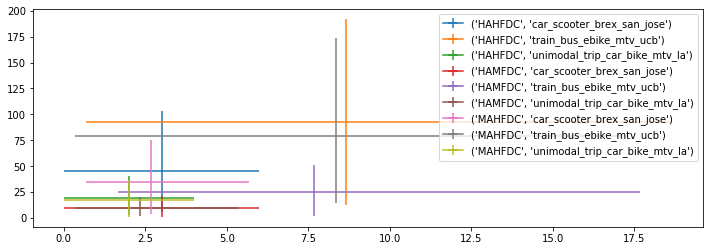

In [36]:
ifig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
errorboxes = []
for key, df in tradeoff_df.query("phone_os == 'android'").groupby(["role", "timeline"]):
    print(key, df)
    tcd = df.trip_count
    bd = df.battery_drain
    print("Plotting rect with params %s, %d, %d" % (str((tcd.min(), bd.min())),
                                                    tcd.max() - tcd.min(),
                                                    bd.max() - bd.min()))
    print(tcd.min(), tcd.max(), tcd.std())
    xerror = np.array([[tcd.min(), tcd.max()]])
    print(xerror.shape)
    ax.errorbar(x=tcd.mean(), y=bd.mean(), xerr=[[tcd.min()], [tcd.max()]], yerr=[[bd.min()], [bd.max()]], label=key)
plt.legend()

### Timeline + trip specific variation

How many sensed trips matched to each ground truth trip?

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, 'Trip count differences v/s configured quality over multiple timelines')

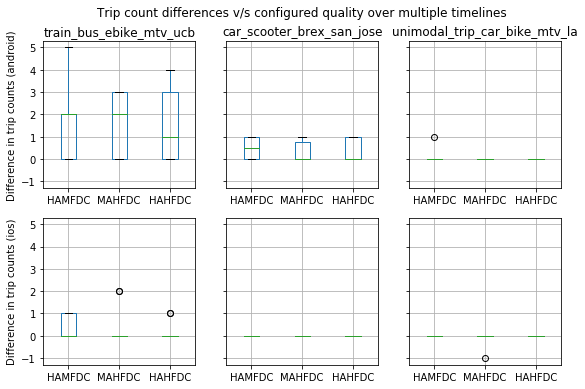

In [37]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(9,6), sharex=False, sharey=True)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    tradeoff_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["count_diff"], by=["quality"])
    ax_array[0][i].set_title(tl)
    tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["count_diff"], by=["quality"])
    ax_array[1][i].set_title("")
    # tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[2][i], column=["visit_reports"], by=["quality"])
    # ax_array[2][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for i, ax in enumerate(ax_array[0]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

# for ax in ax_array[1]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

# for ax in ax_array[2]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

ax_array[0][0].set_ylabel("Difference in trip counts (android)")
ax_array[1][0].set_ylabel("Difference in trip counts (ios)")
# ax_array[2][0].set_ylabel("Difference in visit reports (ios)")
ifig.suptitle("Trip count differences v/s configured quality over multiple timelines")
# ifig.tight_layout()

### Timeline specific variation

In [38]:
def plot_count_with_errors(ax_array, phone_os):
    for i, (tl, trip_gt) in enumerate(timeline_trip_gt.items()):
        ax_array[i].bar(0, trip_gt)
        for q in range(1,4):
            curr_df = tradeoff_df.query("timeline == @tl & phone_os == @phone_os & quality == @q")
            print("%s %s %s values = %s %s %s" % (phone_os, tl, q2r_map[q], curr_df.trip_count.min(), curr_df.trip_count.mean(), curr_df.trip_count.max()))
            lower_error = curr_df.trip_count.mean() - curr_df.trip_count.min()
            upper_error = curr_df.trip_count.max() - curr_df.trip_count.mean()
            ax_array[i].bar(x=q, height=curr_df.trip_count.mean(),
                            yerr=[[lower_error], [upper_error]])
            print("%s %s %s errors = %s %s %s" % (phone_os, tl, q2r_map[q], lower_error, curr_df.trip_count.mean(), upper_error))
            ax_array[i].set_title(tl)

android train_bus_ebike_mtv_ucb HAMFDC values = 6 7.666666666666667 10
android train_bus_ebike_mtv_ucb HAMFDC errors = 1.666666666666667 7.666666666666667 2.333333333333333
android train_bus_ebike_mtv_ucb MAHFDC values = 8 8.333333333333334 9
android train_bus_ebike_mtv_ucb MAHFDC errors = 0.3333333333333339 8.333333333333334 0.6666666666666661
android train_bus_ebike_mtv_ucb HAHFDC values = 8 8.666666666666666 10
android train_bus_ebike_mtv_ucb HAHFDC errors = 0.6666666666666661 8.666666666666666 1.333333333333334
android car_scooter_brex_san_jose HAMFDC values = 3 3.0 3
android car_scooter_brex_san_jose HAMFDC errors = 0.0 3.0 0.0
android car_scooter_brex_san_jose MAHFDC values = 2 2.6666666666666665 3
android car_scooter_brex_san_jose MAHFDC errors = 0.6666666666666665 2.6666666666666665 0.3333333333333335
android car_scooter_brex_san_jose HAHFDC values = 3 3.0 3
android car_scooter_brex_san_jose HAHFDC errors = 0.0 3.0 0.0
android unimodal_trip_car_bike_mtv_la HAMFDC values = 2 2.3

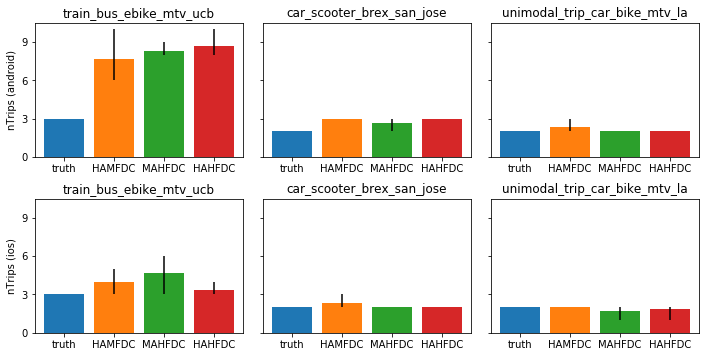

In [39]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(10,5), sharex=False, sharey=True)
timeline_trip_gt = {"train_bus_ebike_mtv_ucb": 3,
                    "car_scooter_brex_san_jose": 2,
                    "unimodal_trip_car_bike_mtv_la": 2}

plot_count_with_errors(ax_array[0], "android")
plot_count_with_errors(ax_array[1], "ios")

for ax in ax_array[0]:
    ax.set_xticks(range(0,4))
    ax.set_xticklabels(["truth"] + [q2r_map[r] for r in range(1,4)])
    ax.set_yticks(range(0,tradeoff_df.trip_count.max(),3))
    
for ax in ax_array[1]:
    ax.set_xticks(range(0,4))
    ax.set_xticklabels(["truth"] + [q2r_map[r] for r in range(1,4)])
    ax.set_yticks(range(0,tradeoff_df.trip_count.max(),3))
    
ax_array[0,0].set_ylabel("nTrips (android)")
ax_array[1,0].set_ylabel("nTrips (ios)")
    
ifig.tight_layout(pad=0.85)

## Start end results

In [40]:
for r, df in tradeoff_df.query("timeline == @tl & phone_os == 'android'").groupby("role"):
    print(r, df.trip_count.mean() , df.trip_count.min(), df.trip_count.max())

HAHFDC 2.0 2 2
HAMFDC 2.3333333333333335 2 3
MAHFDC 2.0 2 2


The HAHFDC phone ran out of battery on all three runs of the `train_bus_ebike_mtv_ucb` timeline, so the trips never ended. Let's remove those so that they don't obfuscate the values from the other runs. 

In [41]:
out_of_battery_phones = tradeoff_df.query("timeline=='train_bus_ebike_mtv_ucb' & role=='HAHFDC' & trip_id=='berkeley_to_mtv_SF_express_bus_0' & phone_os == 'android'")
for i in out_of_battery_phones.index:
    tradeoff_df.loc[i,"end_diff_mins"] = float('nan')

In [42]:
tradeoff_df.query("timeline=='train_bus_ebike_mtv_ucb' & role=='HAHFDC' & trip_id=='berkeley_to_mtv_SF_express_bus_0' & phone_os == 'android'")

battery_drain  count     duration  end_diff_mins        phone_label  \
98       95.000000      5 46332.366000            nan  ucb-sdb-android-2   
101      93.000000      1 44863.886000            nan  ucb-sdb-android-2   
104      80.000000      1 44852.983000            nan  ucb-sdb-android-2   
134      99.000000      4 43130.491000            nan  ucb-sdb-android-2   
137      92.000000      1 44683.567000            nan  ucb-sdb-android-2   
140      98.000000      3 42613.098000            nan  ucb-sdb-android-2   

    phone_os                    range_id    role  run  start_diff_mins  \
98   android  HAHFDC v/s HAMFDC:HAHFDC_0  HAHFDC    0         5.379346   
101  android  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1         2.309897   
104  android  HAHFDC v/s HAMFDC:HAHFDC_2  HAHFDC    2         2.573813   
134  android  HAHFDC v/s MAHFDC:HAHFDC_0  HAHFDC    0         0.990112   
137  android  HAHFDC v/s MAHFDC:HAHFDC_1  HAHFDC    1         1.483603   
140  android  HAHFDC v/s MAHFDC:HAHFDC_2  HAHFDC    2         0.134640   

                    timeline  trip_count                           trip_id  \
98   train_bus_ebike_mtv_ucb           9  berkeley_to_mtv_SF_express_bus_0   
101  train_bus_ebike_mtv_ucb           8  berkeley_to_mtv_SF_express_bus_0   
104  train_bus_ebike_mtv_ucb          10  berkeley_to_mtv_SF_express_bus_0   
134  train_bus_ebike_mtv_ucb           9  berkeley_to_mtv_SF_express_bus_0   
137  train_bus_ebike_mtv_ucb           8  berkeley_to_mtv_SF_express_bus_0   
140  train_bus_ebike_mtv_ucb           8  berkeley_to_mtv_SF_express_bus_0   

     quality  count_diff  
98         3           4  
101        3           0  
104        3           0  
134        3           3  
137        3           0  
140        3           2

### Overall results

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, '')

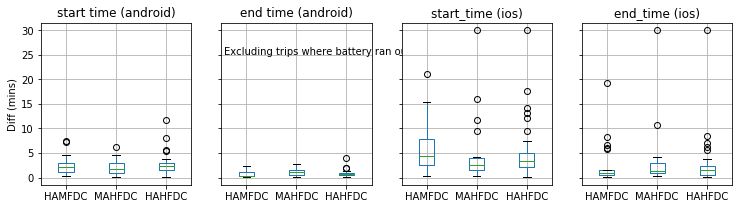

In [43]:
ifig, ax_array = plt.subplots(nrows=1,ncols=4,figsize=(12,3), sharex=False, sharey=True)
tradeoff_df.query("phone_os == 'android'").boxplot(ax = ax_array[0], column=["start_diff_mins"], by=["quality"])
ax_array[0].set_title("start time (android)")
tradeoff_df.query("phone_os == 'android'").boxplot(ax = ax_array[1], column=["end_diff_mins"], by=["quality"])
ax_array[1].set_title("end time (android)")
tradeoff_df.query("phone_os == 'ios'").boxplot(ax = ax_array[2], column=["start_diff_mins"], by=["quality"])
ax_array[2].set_title("start_time (ios)")
tradeoff_df.query("phone_os == 'ios'").boxplot(ax = ax_array[3], column=["end_diff_mins"], by=["quality"])
ax_array[3].set_title("end_time (ios)")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

ax_array[0].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[0].get_xticklabels()])
ax_array[1].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[1].get_xticklabels()])
ax_array[2].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[2].get_xticklabels()])
ax_array[3].set_xticklabels([q2r_map[int(t.get_text())] for t in ax_array[3].get_xticklabels()])

for ax in ax_array:
    ax.set_xlabel("")

ax_array[1].text(0.55,25,"Excluding trips where battery ran out")

ax_array[0].set_ylabel("Diff (mins)")
# ifig.suptitle("Trip start end accuracy v/s configured quality")
ifig.suptitle("")
# ifig.tight_layout(pad=1.7)

### Timeline specific

/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/shankari/OSS/anaconda/envs/emissioneval/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .value

Text(0.5, 0.98, 'Trip start end accuracy (mins) v/s configured quality over multiple timelines')

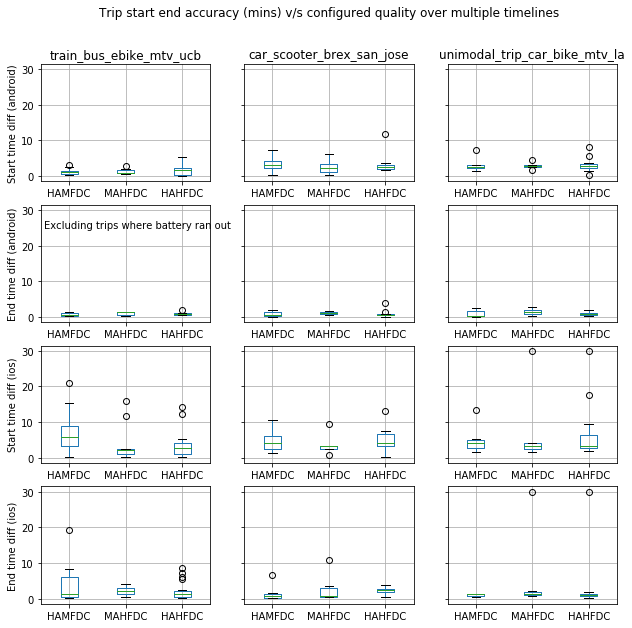

In [44]:
ifig, ax_array = plt.subplots(nrows=4,ncols=3,figsize=(10,10), sharex=False, sharey=True)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    tradeoff_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["start_diff_mins"], by=["quality"])
    ax_array[0][i].set_title(tl)
    tradeoff_df.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[1][i], column=["end_diff_mins"], by=["quality"])
    ax_array[1][i].set_title("")
    tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[2][i], column=["start_diff_mins"], by=["quality"])
    ax_array[2][i].set_title("")
    tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[3][i], column=["end_diff_mins"], by=["quality"])
    ax_array[3][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for ax in ax_array[0]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")
    
for ax in ax_array[1]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[1,0].text(0.55,25,"Excluding trips where battery ran out")

for ax in ax_array[2]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for ax in ax_array[3]:
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

ax_array[0][0].set_ylabel("Start time diff (android)")
ax_array[1][0].set_ylabel("End time diff (android)")
ax_array[2][0].set_ylabel("Start time diff (ios)")
ax_array[3][0].set_ylabel("End time diff (ios)")
ifig.suptitle("Trip start end accuracy (mins) v/s configured quality over multiple timelines")

# ifig.tight_layout(pad=2.5)

## Outlier checks

We can have unexpected values for both time and count. Unfortunately, there is no overlap between the two (intersection is zero). So we will look at a random sample from both cases

In [45]:
expected_legs = "&".join(["not (trip_id == 'bus trip with e-scooter access_0' & count == 2)",
                            "not (trip_id == 'mtv_to_berkeley_sf_bart_0' & count == 3)"])
count_outliers = tradeoff_df.query("count > 1 & %s" % expected_legs)
count_outliers[["phone_os", "range_id", "trip_id", "run", "role", "count", "start_diff_mins", "end_diff_mins"]].head()

phone_os                    range_id                           trip_id  \
15   android  HAHFDC v/s HAMFDC:HAMFDC_1                suburb_bicycling_0   
98   android  HAHFDC v/s HAMFDC:HAHFDC_0  berkeley_to_mtv_SF_express_bus_0   
99   android  HAHFDC v/s HAMFDC:HAHFDC_1         mtv_to_berkeley_sf_bart_0   
107  android  HAHFDC v/s HAMFDC:HAMFDC_0  berkeley_to_mtv_SF_express_bus_0   
108  android  HAHFDC v/s HAMFDC:HAMFDC_1         mtv_to_berkeley_sf_bart_0   

     run    role  count  start_diff_mins  end_diff_mins  
15     1  HAMFDC      2         2.166251       0.252836  
98     0  HAHFDC      5         5.379346            nan  
99     1  HAHFDC      4         2.214731       1.070741  
107    0  HAMFDC      3         1.411066       0.238970  
108    1  HAMFDC      2         2.392798       0.470741

In [46]:
tradeoff_df.query("count < 1 & role == 'HAHFDC'")

Empty DataFrame
Columns: [battery_drain, count, duration, end_diff_mins, phone_label, phone_os, range_id, role, run, start_diff_mins, timeline, trip_count, trip_id, quality, count_diff]
Index: []

In [47]:
time_outliers = tradeoff_df.query("start_diff_mins == 30 | end_diff_mins == 30")
time_outliers[["phone_os", "range_id", "trip_id", "run", "role", "start_diff_mins", "end_diff_mins"]].head()

phone_os                    range_id                        trip_id  run  \
32      ios  HAHFDC v/s HAMFDC:HAHFDC_1  suburb_city_driving_weekend_0    1   
33      ios  HAHFDC v/s HAMFDC:HAHFDC_1             suburb_bicycling_0    1   
36      ios  HAHFDC v/s MAHFDC:MAHFDC_0  suburb_city_driving_weekend_0    0   

      role  start_diff_mins  end_diff_mins  
32  HAHFDC        17.658354      30.000000  
33  HAHFDC        30.000000       1.644287  
36  MAHFDC        30.000000      30.000000

In [48]:
print(len(time_outliers.index.union(count_outliers.index)), len(time_outliers.index.intersection(count_outliers.index)))

26 0


In [49]:
time_outliers.sample(n=3, random_state=1)[["phone_os", "range_id", "trip_id", "run", "role", "count", "start_diff_mins", "end_diff_mins"]]

phone_os                    range_id                        trip_id  run  \
32      ios  HAHFDC v/s HAMFDC:HAHFDC_1  suburb_city_driving_weekend_0    1   
36      ios  HAHFDC v/s MAHFDC:MAHFDC_0  suburb_city_driving_weekend_0    0   
33      ios  HAHFDC v/s HAMFDC:HAHFDC_1             suburb_bicycling_0    1   

      role  count  start_diff_mins  end_diff_mins  
32  HAHFDC      1        17.658354      30.000000  
36  MAHFDC      0        30.000000      30.000000  
33  HAHFDC      1        30.000000       1.644287

In [50]:
count_outliers.sample(n=3, random_state=1)[["phone_os", "range_id", "trip_id", "run", "role", "count", "start_diff_mins", "end_diff_mins"]]

phone_os                    range_id                           trip_id  \
159      ios  HAHFDC v/s HAMFDC:HAMFDC_0         mtv_to_berkeley_sf_bart_0   
146  android  HAHFDC v/s MAHFDC:MAHFDC_1  berkeley_to_mtv_SF_express_bus_0   
107  android  HAHFDC v/s HAMFDC:HAMFDC_0  berkeley_to_mtv_SF_express_bus_0   

     run    role  count  start_diff_mins  end_diff_mins  
159    0  HAMFDC      2         8.970962       0.146694  
146    1  MAHFDC      4         0.509430       1.250858  
107    0  HAMFDC      3         1.411066       0.238970

In [67]:
tradeoff_df.query("timeline == 'train_bus_ebike_mtv_ucb' & quality == 3 & phone_os == 'ios'").sort_values(by="start_diff_mins")

battery_drain  count     duration  end_diff_mins    phone_label phone_os  \
114      37.000000      2 46530.263775       8.508157  ucb-sdb-ios-2      ios   
122      33.999997      1 44750.494011       0.469058  ucb-sdb-ios-2      ios   
151      43.000001      1 43172.048678       0.593539  ucb-sdb-ios-2      ios   
121      33.999997      1 44750.494011       0.555327  ucb-sdb-ios-2      ios   
154      38.000000      1 44696.648613       2.251630  ucb-sdb-ios-2      ios   
157      35.000002      1 42584.159111       0.143166  ucb-sdb-ios-2      ios   
115      37.000000      1 46530.263775       1.570017  ucb-sdb-ios-2      ios   
156      35.000002      1 42584.159111       1.576582  ucb-sdb-ios-2      ios   
119      37.000000      2 44897.351051       7.056017  ucb-sdb-ios-2      ios   
116      37.000000      1 46530.263775       0.255409  ucb-sdb-ios-2      ios   
120      33.999997      1 44750.494011       1.026465  ucb-sdb-ios-2      ios   
118      37.000000      1 44897.351051       1.705130  ucb-sdb-ios-2      ios   
150      43.000001      1 43172.048678       1.588135  ucb-sdb-ios-2      ios   
158      35.000002      1 42584.159111       1.179781  ucb-sdb-ios-2      ios   
152      43.000001      1 43172.048678       6.170219  ucb-sdb-ios-2      ios   
117      37.000000      1 44897.351051       0.645905  ucb-sdb-ios-2      ios   
155      38.000000      1 44696.648613       5.613607  ucb-sdb-ios-2      ios   
153      38.000000      1 44696.648613       0.287331  ucb-sdb-ios-2      ios   

                       range_id    role  run  start_diff_mins  \
114  HAHFDC v/s MAHFDC:HAHFDC_0  HAHFDC    0         0.058634   
122  HAHFDC v/s MAHFDC:HAHFDC_2  HAHFDC    2         0.137441   
151  HAHFDC v/s HAMFDC:HAHFDC_0  HAHFDC    0         0.845397   
121  HAHFDC v/s MAHFDC:HAHFDC_2  HAHFDC    2         0.916223   
154  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1         1.053398   
157  HAHFDC v/s HAMFDC:HAHFDC_2  HAHFDC    2         1.263460   
115  HAHFDC v/s MAHFDC:HAHFDC_0  HAHFDC    0         1.496899   
156  HAHFDC v/s HAMFDC:HAHFDC_2  HAHFDC    2         2.082915   
119  HAHFDC v/s MAHFDC:HAHFDC_1  HAHFDC    1         2.469775   
116  HAHFDC v/s MAHFDC:HAHFDC_0  HAHFDC    0         2.752900   
120  HAHFDC v/s MAHFDC:HAHFDC_2  HAHFDC    2         3.181262   
118  HAHFDC v/s MAHFDC:HAHFDC_1  HAHFDC    1         3.967191   
150  HAHFDC v/s HAMFDC:HAHFDC_0  HAHFDC    0         4.154419   
158  HAHFDC v/s HAMFDC:HAHFDC_2  HAHFDC    2         4.193443   
152  HAHFDC v/s HAMFDC:HAHFDC_0  HAHFDC    0         4.716687   
117  HAHFDC v/s MAHFDC:HAHFDC_1  HAHFDC    1         5.131662   
155  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1        12.156766   
153  HAHFDC v/s HAMFDC:HAHFDC_1  HAHFDC    1        14.105514   

                    timeline  trip_count                           trip_id  \
114  train_bus_ebike_mtv_ucb           4         mtv_to_berkeley_sf_bart_0   
122  train_bus_ebike_mtv_ucb           3  berkeley_to_mtv_SF_express_bus_0   
151  train_bus_ebike_mtv_ucb           3           walk_urban_university_0   
121  train_bus_ebike_mtv_ucb           3           walk_urban_university_0   
154  train_bus_ebike_mtv_ucb           3           walk_urban_university_0   
157  train_bus_ebike_mtv_ucb           3           walk_urban_university_0   
115  train_bus_ebike_mtv_ucb           4           walk_urban_university_0   
156  train_bus_ebike_mtv_ucb           3         mtv_to_berkeley_sf_bart_0   
119  train_bus_ebike_mtv_ucb           4  berkeley_to_mtv_SF_express_bus_0   
116  train_bus_ebike_mtv_ucb           4  berkeley_to_mtv_SF_express_bus_0   
120  train_bus_ebike_mtv_ucb           3         mtv_to_berkeley_sf_bart_0   
118  train_bus_ebike_mtv_ucb           4           walk_urban_university_0   
150  train_bus_ebike_mtv_ucb           3         mtv_to_berkeley_sf_bart_0   
158  train_bus_ebike_mtv_ucb           3  berkeley_to_mtv_SF_express_bus_0   
152  train_bus_ebike_mtv_ucb           3  berkeley_to_mtv_S

In [51]:
fmt = lambda ts: arrow.get(ts).to("America/Los_Angeles")

In [52]:
import IPython.display as ipyd

def check_outlier(eval_range, trip_idx, mismatch_key):
    eval_trip_range = eval_range["evaluation_trip_ranges"][trip_idx]
    print("Trip %s, ground truth experiment for metric %s, experiment %s -> %s, trip %s -> %s" %
          (eval_range["trip_id"], mismatch_key,
           fmt(eval_range["start_ts"]), fmt(eval_range["end_ts"]),
           fmt(eval_trip_range["start_ts"]), fmt(eval_trip_range["end_ts"])))
    print([(fmt(sr["start_ts"]), fmt(sr["end_ts"])) for sr in eval_trip_range["matching_trip_range"]["match"]])
    print("**** For entire experiment ***")
    print([(fmt(sr["data"]["start_ts"]), fmt(sr["data"]["end_ts"])) for sr in eval_range["sensed_trip_ranges"]])
    ipyd.display(eval_range["transition_df"][["transition", "fmt_time"]])
    if mismatch_key == "end_ts":
        # print("Transitions after trip end")
        # print(eval_range["transition_df"].query("ts > %s" % eval_trip_range["end_ts"])[["transition", "fmt_time"]])
        return ezpv.display_map_detail_from_df(eval_trip_range["location_df"])
    else:
        return ezpv.display_map_detail_from_df(eval_trip_range["location_df"])

#####  MAHFDC is just terrible

It looks like with MAHFDC, we essentially get no trip ends on android. Let's investigate these a bit further.
- run 0: trip never ended: trip actually ended just before next trip started `15:01:26`. And then next trip had geofence exit, but we didn't detect it because it never ended, so we didn't create a sensed range for it.
- run 1: trip ended but after 30 mins: similar behavior; trip ended just before next trip started `15:49:39`.

In [53]:
tradeoff_df.query("phone_os == 'android' & role == 'MAHFDC' & timeline == 'car_scooter_brex_san_jose'")[["range_id", "trip_id", "run", "role", "count", "start_diff_mins", "end_diff_mins"]]

range_id                           trip_id  run    role  \
66  HAHFDC v/s MAHFDC:MAHFDC_0         freeway_driving_weekday_0    0  MAHFDC   
67  HAHFDC v/s MAHFDC:MAHFDC_0  bus trip with e-scooter access_0    0  MAHFDC   
68  HAHFDC v/s MAHFDC:MAHFDC_1         freeway_driving_weekday_0    1  MAHFDC   
69  HAHFDC v/s MAHFDC:MAHFDC_1  bus trip with e-scooter access_0    1  MAHFDC   
70  HAHFDC v/s MAHFDC:MAHFDC_2         freeway_driving_weekday_0    2  MAHFDC   
71  HAHFDC v/s MAHFDC:MAHFDC_2  bus trip with e-scooter access_0    2  MAHFDC   

    count  start_diff_mins  end_diff_mins  
66      1         3.355367       1.398308  
67      2         6.260592       0.894846  
68      1         1.143474       1.613608  
69      2         2.932153       0.810580  
70      1         1.352617       1.036283  
71      1         0.187664       0.487233

In [54]:
FMT_STRING = "HH:mm:SS"
for t in av_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][3]["evaluation_trip_ranges"]:
    print(sd_sj.fmt(t["start_ts"], FMT_STRING), "->", sd_sj.fmt(t["end_ts"], FMT_STRING))
av_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][3]["transition_df"]

10:28:24 -> 10:56:14
15:02:86 -> 16:19:39


currState                        transition  \
0            local.state.ongoing_trip    local.transition.stop_tracking   
1            local.state.ongoing_trip   local.transition.start_tracking   
2        local.state.tracking_stopped   local.transition.start_tracking   
3                   local.state.start       local.transition.initialize   
4  local.state.waiting_for_trip_start  local.transition.exited_geofence   
5            local.state.ongoing_trip   local.transition.stopped_moving   
6  local.state.waiting_for_trip_start  local.transition.exited_geofence   

                 ts          write_ts                          fmt_time  \
0 1565026028.535000 1565026028.536000  2019-08-05T10:27:08.535000-07:00   
1 1565026028.712000 1565026028.713000  2019-08-05T10:27:08.712000-07:00   
2 1565026029.574000 1565026029.575000  2019-08-05T10:27:09.574000-07:00   
3 1565026029.765000 1565026029.767000  2019-08-05T10:27:09.765000-07:00   
4 1565026281.459000 1565026281.460000  2019-08-05T10:31:21.459000-07:00   
5 1565042486.184000 1565042486.185000  2019-08-05T15:01:26.184000-07:00   
6 1565042543.568000 1565042543.569000  2019-08-05T15:02:23.568000-07:00   

        hr  
0 0.000033  
1 0.000082  
2 0.000321  
3 0.000374  
4 0.070289  
5 4.571602  
6 4.587542

In [57]:
check_outlier(av_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][4], 0, "end_ts")

Trip HAHFDC v/s MAHFDC:MAHFDC_1, ground truth experiment for metric end_ts, experiment 2019-08-06T11:27:41.463000-07:00 -> 2019-08-06T18:11:36.074000-07:00, trip 2019-08-06T11:28:13.260763-07:00 -> 2019-08-06T11:59:45.816486-07:00
[(<Arrow [2019-08-06T11:27:04.652325-07:00]>, <Arrow [2019-08-06T11:58:09-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-08-06T11:27:04.652325-07:00]>, <Arrow [2019-08-06T11:58:09-07:00]>), (<Arrow [2019-08-06T15:49:07.623293-07:00]>, <Arrow [2019-08-06T16:10:48-07:00]>), (<Arrow [2019-08-06T16:17:22.646117-07:00]>, <Arrow [2019-08-06T17:11:15.095000-07:00]>)]


transition                          fmt_time
0   local.transition.start_tracking  2019-08-06T11:27:41.598000-07:00
1       local.transition.initialize  2019-08-06T11:27:41.768000-07:00
2  local.transition.exited_geofence  2019-08-06T11:27:42.259000-07:00
3   local.transition.stopped_moving  2019-08-06T15:49:39.026000-07:00
4  local.transition.exited_geofence  2019-08-06T15:50:41.922000-07:00
5   local.transition.stopped_moving  2019-08-06T16:15:17.573000-07:00
6  local.transition.exited_geofence  2019-08-06T16:20:36.609000-07:00
7   local.transition.stopped_moving  2019-08-06T18:11:17.124000-07:00

In [58]:
check_outlier(av_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][4], 1, "end_ts")

Trip HAHFDC v/s MAHFDC:MAHFDC_1, ground truth experiment for metric end_ts, experiment 2019-08-06T11:27:41.463000-07:00 -> 2019-08-06T18:11:36.074000-07:00, trip 2019-08-06T15:46:11.694115-07:00 -> 2019-08-06T17:10:26.460179-07:00
[(<Arrow [2019-08-06T15:49:07.623293-07:00]>, <Arrow [2019-08-06T16:10:48-07:00]>), (<Arrow [2019-08-06T16:17:22.646117-07:00]>, <Arrow [2019-08-06T17:11:15.095000-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-08-06T11:27:04.652325-07:00]>, <Arrow [2019-08-06T11:58:09-07:00]>), (<Arrow [2019-08-06T15:49:07.623293-07:00]>, <Arrow [2019-08-06T16:10:48-07:00]>), (<Arrow [2019-08-06T16:17:22.646117-07:00]>, <Arrow [2019-08-06T17:11:15.095000-07:00]>)]


transition                          fmt_time
0   local.transition.start_tracking  2019-08-06T11:27:41.598000-07:00
1       local.transition.initialize  2019-08-06T11:27:41.768000-07:00
2  local.transition.exited_geofence  2019-08-06T11:27:42.259000-07:00
3   local.transition.stopped_moving  2019-08-06T15:49:39.026000-07:00
4  local.transition.exited_geofence  2019-08-06T15:50:41.922000-07:00
5   local.transition.stopped_moving  2019-08-06T16:15:17.573000-07:00
6  local.transition.exited_geofence  2019-08-06T16:20:36.609000-07:00
7   local.transition.stopped_moving  2019-08-06T18:11:17.124000-07:00

In [59]:
FMT_STRING = "HH:mm:SS"
for t in pv_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][4]["evaluation_trip_ranges"]:
    print(sd_sj.fmt(t["start_ts"], FMT_STRING), "->", sd_sj.fmt(t["end_ts"], FMT_STRING))
pv_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][4]["transition_df"]

11:28:26 -> 11:59:81
15:46:69 -> 17:10:46


currState                        transition  \
0        local.state.tracking_stopped   local.transition.start_tracking   
1                   local.state.start       local.transition.initialize   
2  local.state.waiting_for_trip_start  local.transition.exited_geofence   
3            local.state.ongoing_trip   local.transition.stopped_moving   
4  local.state.waiting_for_trip_start  local.transition.exited_geofence   
5            local.state.ongoing_trip   local.transition.stopped_moving   
6  local.state.waiting_for_trip_start  local.transition.exited_geofence   
7            local.state.ongoing_trip   local.transition.stopped_moving   

                 ts          write_ts                          fmt_time  \
0 1565116061.598000 1565116061.599000  2019-08-06T11:27:41.598000-07:00   
1 1565116061.768000 1565116061.768000  2019-08-06T11:27:41.768000-07:00   
2 1565116062.259000 1565116062.260000  2019-08-06T11:27:42.259000-07:00   
3 1565131779.026000 1565131779.027000  2019-08-06T15:49:39.026000-07:00   
4 1565131841.922000 1565131841.923000  2019-08-06T15:50:41.922000-07:00   
5 1565133317.573000 1565133317.574000  2019-08-06T16:15:17.573000-07:00   
6 1565133636.609000 1565133636.611000  2019-08-06T16:20:36.609000-07:00   
7 1565140277.124000 1565140277.125000  2019-08-06T18:11:17.124000-07:00   

        hr  
0 0.000037  
1 0.000085  
2 0.000221  
3 4.365990  
4 4.383461  
5 4.793364  
6 4.881985  
7 6.726573

##### HAHFDC detection errors on the second run 

In [68]:
# 155 	38.000000 	1 	44696.648613 	5.613607 	ucb-sdb-ios-2 	ios 	HAHFDC v/s HAMFDC:HAHFDC_1 	HAHFDC 	1 	12.156766 	train_bus_ebike_mtv_ucb 	3 	berkeley_to_mtv_SF_express_bus_0 	3 	0
# 153 	38.000000 	1 	44696.648613 	0.287331 	ucb-sdb-ios-2 	ios 	HAHFDC v/s HAMFDC:HAHFDC_1 	HAHFDC 	1 	14.105514 	train_bus_ebike_mtv_ucb 	3 	mtv_to_berkeley_sf_bart_0 	3 	0
    
check_outlier(av_ucb_reroute.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][1], 0, "start_ts")

Trip HAHFDC v/s HAMFDC:HAHFDC_1, ground truth experiment for metric start_ts, experiment 2019-09-11T08:10:23.776147-07:00 -> 2019-09-11T20:35:20.424760-07:00, trip 2019-09-11T08:12:17.541266-07:00 -> 2019-09-11T10:37:45.750265-07:00
[(<Arrow [2019-09-11T08:26:23.872133-07:00]>, <Arrow [2019-09-11T10:38:02.990150-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-09-11T08:26:23.872133-07:00]>, <Arrow [2019-09-11T10:38:02.990150-07:00]>), (<Arrow [2019-09-11T13:47:36.966267-07:00]>, <Arrow [2019-09-11T13:56:26.988645-07:00]>), (<Arrow [2019-09-11T16:38:08.902045-07:00]>, <Arrow [2019-09-11T19:52:09.994150-07:00]>)]


transition                          fmt_time
0        T_START_TRACKING  2019-09-11T08:10:23.862350-07:00
1            T_INITIALIZE  2019-09-11T08:10:23.929908-07:00
2         T_INIT_COMPLETE  2019-09-11T08:10:24.816498-07:00
3           T_VISIT_ENDED  2019-09-11T08:15:48.135526-07:00
4          T_TRIP_STARTED  2019-09-11T08:15:48.222487-07:00
5          T_TRIP_STARTED  2019-09-11T08:15:48.360066-07:00
6         T_VISIT_STARTED  2019-09-11T08:15:48.514289-07:00
7     T_TRIP_END_DETECTED  2019-09-11T08:15:48.572777-07:00
8           T_VISIT_ENDED  2019-09-11T08:30:33.384772-07:00
9         T_VISIT_STARTED  2019-09-11T10:39:18.410637-07:00
10    T_TRIP_END_DETECTED  2019-09-11T10:39:18.536329-07:00
11    T_END_TRIP_TRACKING  2019-09-11T10:39:19.861709-07:00
12           T_TRIP_ENDED  2019-09-11T10:39:19.950380-07:00
13          T_DATA_PUSHED  2019-09-11T13:49:44.179394-07:00
14                  T_NOP  2019-09-11T13:49:44.457323-07:00
15      T_EXITED_GEOFENCE  2019-09-11T13:49:54.038779-07:00
16         T_TRIP_STARTED  2019-09-11T13:49:54.134330-07:00
17         T_TRIP_STARTED  2019-09-11T13:49:54.293875-07:00
18       T_TRIP_RESTARTED  2019-09-11T13:49:54.443973-07:00
19          T_VISIT_ENDED  2019-09-11T13:56:25.425220-07:00
20        T_VISIT_STARTED  2019-09-11T13:56:26.363768-07:00
21    T_TRIP_END_DETECTED  2019-09-11T13:56:26.453970-07:00
22    T_END_TRIP_TRACKING  2019-09-11T13:56:27.779014-07:00
23           T_TRIP_ENDED  2019-09-11T13:56:27.866704-07:00
24                  T_NOP  2019-09-11T13:56:31.302123-07:00
25                  T_NOP  2019-09-11T13:56:31.434820-07:00
26                  T_NOP  2019-09-11T14:00:11.908835-07:00
27          T_VISIT_ENDED  2019-09-11T14:05:32.843475-07:00
28         T_TRIP_STARTED  2019-09-11T14:05:32.933270-07:00
29         T_TRIP_STARTED  2019-09-11T14:05:33.085345-07:00
30        T_VISIT_STARTED  2019-09-11T14:05:33.254889-07:00
31    T_TRIP_END_DETECTED  2019-09-11T14:05:33.316592-07:00
32          T_VISIT_ENDED  2019-09-11T16:38:20.549193-07:00
33        T_VISIT_STARTED  2019-09-11T16:53:57.507564-07:00
34    T_TRIP_END_DETECTED  2019-09-11T16:53:57.611930-07:00
35    T_END_TRIP_TRACKING  2019-09-11T16:53:58.885729-07:00
36           T_TRIP_ENDED  2019-09-11T16:53:59.025989-07:00
37          T_DATA_PUSHED  2019-09-11T17:18:18.711724-07:00
38      T_EXITED_GEOFENCE  2019-09-11T17:18:18.777224-07:00
39         T_TRIP_STARTED  2019-09-11T17:18:18.841511-07:00
40         T_TRIP_STARTED  2019-09-11T17:18:18.951581-07:00
41       T_TRIP_RESTARTED  2019-09-11T17:18:19.065349-07:00
42          T_VISIT_ENDED  2019-09-11T17:21:47.502798-07:00
43        T_VISIT_STARTED  2019-09-11T19:52:08.805079-07:00
44    T_TRIP_END_DETECTED  2019-09-11T19:52:08.895056-07:00
45    T_END_TRIP_TRACKING  2019-09-11T19:52:11.274411-07:00
46           T_TRIP_ENDED  2019-09-11T19:52:11.362925-07:00
47                  T_NOP  2019-09-11T19:52:18.742716-07:00
48                  T_NOP  2019-09-11T19:52:18.874162-07:00
49                  T_NOP  2019-09-11T19:52:19.006513-07:00
50                  T_NOP  2019-09-11T19:52:19.214550-07:00
51          T_VISIT_ENDED  2019-09-11T20:00:18.792561-07:00
52         T_TRIP_STARTED  2019-09-11T20:00:18.850583-07:00
53         T_TRIP_STARTED  2019-09-11T20:00:19.021376-07:00
54        T_VISIT_STARTED  2019-09-11T20:00:19.238652-07:00
55    T_TRIP_END_DETECTED  2019-09-11T20:00:19.313529-07:00
56  T_FORCE_STOP_TRACKING  2019-09-11T20:35:20.062677-07:00
57     T_TRACKING_STOPPED  2019-09-11T20:35:20.168297-07:00

In [69]:
check_outlier(av_ucb_reroute.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][1], 2, "start_ts")

Trip HAHFDC v/s HAMFDC:HAHFDC_1, ground truth experiment for metric start_ts, experiment 2019-09-11T08:10:23.776147-07:00 -> 2019-09-11T20:35:20.424760-07:00, trip 2019-09-11T16:25:59.496105-07:00 -> 2019-09-11T19:57:46.810545-07:00
[(<Arrow [2019-09-11T16:38:08.902045-07:00]>, <Arrow [2019-09-11T19:52:09.994150-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-09-11T08:26:23.872133-07:00]>, <Arrow [2019-09-11T10:38:02.990150-07:00]>), (<Arrow [2019-09-11T13:47:36.966267-07:00]>, <Arrow [2019-09-11T13:56:26.988645-07:00]>), (<Arrow [2019-09-11T16:38:08.902045-07:00]>, <Arrow [2019-09-11T19:52:09.994150-07:00]>)]


transition                          fmt_time
0        T_START_TRACKING  2019-09-11T08:10:23.862350-07:00
1            T_INITIALIZE  2019-09-11T08:10:23.929908-07:00
2         T_INIT_COMPLETE  2019-09-11T08:10:24.816498-07:00
3           T_VISIT_ENDED  2019-09-11T08:15:48.135526-07:00
4          T_TRIP_STARTED  2019-09-11T08:15:48.222487-07:00
5          T_TRIP_STARTED  2019-09-11T08:15:48.360066-07:00
6         T_VISIT_STARTED  2019-09-11T08:15:48.514289-07:00
7     T_TRIP_END_DETECTED  2019-09-11T08:15:48.572777-07:00
8           T_VISIT_ENDED  2019-09-11T08:30:33.384772-07:00
9         T_VISIT_STARTED  2019-09-11T10:39:18.410637-07:00
10    T_TRIP_END_DETECTED  2019-09-11T10:39:18.536329-07:00
11    T_END_TRIP_TRACKING  2019-09-11T10:39:19.861709-07:00
12           T_TRIP_ENDED  2019-09-11T10:39:19.950380-07:00
13          T_DATA_PUSHED  2019-09-11T13:49:44.179394-07:00
14                  T_NOP  2019-09-11T13:49:44.457323-07:00
15      T_EXITED_GEOFENCE  2019-09-11T13:49:54.038779-07:00
16         T_TRIP_STARTED  2019-09-11T13:49:54.134330-07:00
17         T_TRIP_STARTED  2019-09-11T13:49:54.293875-07:00
18       T_TRIP_RESTARTED  2019-09-11T13:49:54.443973-07:00
19          T_VISIT_ENDED  2019-09-11T13:56:25.425220-07:00
20        T_VISIT_STARTED  2019-09-11T13:56:26.363768-07:00
21    T_TRIP_END_DETECTED  2019-09-11T13:56:26.453970-07:00
22    T_END_TRIP_TRACKING  2019-09-11T13:56:27.779014-07:00
23           T_TRIP_ENDED  2019-09-11T13:56:27.866704-07:00
24                  T_NOP  2019-09-11T13:56:31.302123-07:00
25                  T_NOP  2019-09-11T13:56:31.434820-07:00
26                  T_NOP  2019-09-11T14:00:11.908835-07:00
27          T_VISIT_ENDED  2019-09-11T14:05:32.843475-07:00
28         T_TRIP_STARTED  2019-09-11T14:05:32.933270-07:00
29         T_TRIP_STARTED  2019-09-11T14:05:33.085345-07:00
30        T_VISIT_STARTED  2019-09-11T14:05:33.254889-07:00
31    T_TRIP_END_DETECTED  2019-09-11T14:05:33.316592-07:00
32          T_VISIT_ENDED  2019-09-11T16:38:20.549193-07:00
33        T_VISIT_STARTED  2019-09-11T16:53:57.507564-07:00
34    T_TRIP_END_DETECTED  2019-09-11T16:53:57.611930-07:00
35    T_END_TRIP_TRACKING  2019-09-11T16:53:58.885729-07:00
36           T_TRIP_ENDED  2019-09-11T16:53:59.025989-07:00
37          T_DATA_PUSHED  2019-09-11T17:18:18.711724-07:00
38      T_EXITED_GEOFENCE  2019-09-11T17:18:18.777224-07:00
39         T_TRIP_STARTED  2019-09-11T17:18:18.841511-07:00
40         T_TRIP_STARTED  2019-09-11T17:18:18.951581-07:00
41       T_TRIP_RESTARTED  2019-09-11T17:18:19.065349-07:00
42          T_VISIT_ENDED  2019-09-11T17:21:47.502798-07:00
43        T_VISIT_STARTED  2019-09-11T19:52:08.805079-07:00
44    T_TRIP_END_DETECTED  2019-09-11T19:52:08.895056-07:00
45    T_END_TRIP_TRACKING  2019-09-11T19:52:11.274411-07:00
46           T_TRIP_ENDED  2019-09-11T19:52:11.362925-07:00
47                  T_NOP  2019-09-11T19:52:18.742716-07:00
48                  T_NOP  2019-09-11T19:52:18.874162-07:00
49                  T_NOP  2019-09-11T19:52:19.006513-07:00
50                  T_NOP  2019-09-11T19:52:19.214550-07:00
51          T_VISIT_ENDED  2019-09-11T20:00:18.792561-07:00
52         T_TRIP_STARTED  2019-09-11T20:00:18.850583-07:00
53         T_TRIP_STARTED  2019-09-11T20:00:19.021376-07:00
54        T_VISIT_STARTED  2019-09-11T20:00:19.238652-07:00
55    T_TRIP_END_DETECTED  2019-09-11T20:00:19.313529-07:00
56  T_FORCE_STOP_TRACKING  2019-09-11T20:35:20.062677-07:00
57     T_TRACKING_STOPPED  2019-09-11T20:35:20.168297-07:00

##### Visit detection kicked in almost at the end of the trip

In [60]:
# 44 	ios 	suburb_city_driving_weekend_0 	1 	HAMFDC 	0 	30.000000 	30.000000
check_outlier(av_la.map()["ios"]["ucb-sdb-ios-3"]["evaluation_ranges"][4], 0, "start_ts")

Trip HAHFDC v/s HAMFDC:HAMFDC_1, ground truth experiment for metric start_ts, experiment 2019-08-31T10:05:52.313050-07:00 -> 2019-08-31T12:22:17.681006-07:00, trip 2019-08-31T10:07:27.557744-07:00 -> 2019-08-31T10:23:08.473621-07:00
[(<Arrow [2019-08-31T10:20:46.525764-07:00]>, <Arrow [2019-08-31T10:24:27.990058-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-08-31T10:20:46.525764-07:00]>, <Arrow [2019-08-31T10:24:27.990058-07:00]>), (<Arrow [2019-08-31T11:34:09.250570-07:00]>, <Arrow [2019-08-31T11:53:59.924421-07:00]>)]


transition                          fmt_time
0        T_START_TRACKING  2019-08-31T10:05:52.411308-07:00
1            T_INITIALIZE  2019-08-31T10:05:52.488086-07:00
2         T_INIT_COMPLETE  2019-08-31T10:05:53.417643-07:00
3           T_VISIT_ENDED  2019-08-31T10:08:57.227196-07:00
4          T_TRIP_STARTED  2019-08-31T10:08:57.322350-07:00
5          T_TRIP_STARTED  2019-08-31T10:08:57.495289-07:00
6         T_VISIT_STARTED  2019-08-31T10:08:57.878236-07:00
7     T_TRIP_END_DETECTED  2019-08-31T10:08:57.972989-07:00
8           T_VISIT_ENDED  2019-08-31T10:20:46.661019-07:00
9         T_VISIT_STARTED  2019-08-31T10:25:10.390011-07:00
10    T_TRIP_END_DETECTED  2019-08-31T10:25:10.475454-07:00
11    T_END_TRIP_TRACKING  2019-08-31T10:25:11.547359-07:00
12           T_TRIP_ENDED  2019-08-31T10:25:11.644263-07:00
13          T_DATA_PUSHED  2019-08-31T11:35:14.205732-07:00
14      T_EXITED_GEOFENCE  2019-08-31T11:35:14.433469-07:00
15         T_TRIP_STARTED  2019-08-31T11:35:14.549190-07:00
16         T_TRIP_STARTED  2019-08-31T11:35:14.717190-07:00
17       T_TRIP_RESTARTED  2019-08-31T11:35:14.874544-07:00
18          T_VISIT_ENDED  2019-08-31T11:39:27.821600-07:00
19        T_VISIT_STARTED  2019-08-31T11:54:07.882083-07:00
20    T_TRIP_END_DETECTED  2019-08-31T11:54:07.970635-07:00
21    T_END_TRIP_TRACKING  2019-08-31T11:54:09.054134-07:00
22           T_TRIP_ENDED  2019-08-31T11:54:09.137749-07:00
23          T_DATA_PUSHED  2019-08-31T12:22:12.677121-07:00
24  T_FORCE_STOP_TRACKING  2019-08-31T12:22:17.385446-07:00
25     T_TRACKING_STOPPED  2019-08-31T12:22:17.505783-07:00

##### Trip end never detected

Trip ended at 14:11, experiment ended at 14:45. No stopped_moving for the last trip

In [61]:
# 65 	android 	bus trip with e-scooter access_0 	2 	HAMFDC 	1 	3.632239 	30.000000
check_outlier(av_sj.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][2], 1, "end_ts")

Trip HAHFDC v/s HAMFDC:HAMFDC_2, ground truth experiment for metric end_ts, experiment 2019-07-27T09:15:08.508000-07:00 -> 2019-07-27T14:45:30.928000-07:00, trip 2019-07-27T12:53:38.202683-07:00 -> 2019-07-27T14:11:01.009420-07:00
[(<Arrow [2019-07-27T12:56:06.380686-07:00]>, <Arrow [2019-07-27T13:18:35-07:00]>), (<Arrow [2019-07-27T13:22:30.733146-07:00]>, <Arrow [2019-07-27T14:10:51-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-07-27T09:15:11.670212-07:00]>, <Arrow [2019-07-27T09:42:13.223000-07:00]>), (<Arrow [2019-07-27T12:56:06.380686-07:00]>, <Arrow [2019-07-27T13:18:35-07:00]>), (<Arrow [2019-07-27T13:22:30.733146-07:00]>, <Arrow [2019-07-27T14:10:51-07:00]>)]


transition                          fmt_time
0   local.transition.start_tracking  2019-07-27T09:15:08.658000-07:00
1       local.transition.initialize  2019-07-27T09:15:08.843000-07:00
2  local.transition.exited_geofence  2019-07-27T09:15:10.331000-07:00
3   local.transition.stopped_moving  2019-07-27T09:44:51.499000-07:00
4  local.transition.exited_geofence  2019-07-27T12:57:16.137000-07:00
5   local.transition.stopped_moving  2019-07-27T13:20:30.744000-07:00
6  local.transition.exited_geofence  2019-07-27T13:24:39.813000-07:00

##### Trip end detection errors on iOS
Original experiment, explanation for the outliers on the HAHFDC and MAHFDC first runs to San Jose
- HAHFDC: Trip end detected 1.5 hours after real end, but before next trip start
- MAHFDC: Trip end detected 5 hours after real end, at the end of the next trip
- MAHFDC: Clearly this was not even detected as a separate trip, so this is correct. There was a spurious trip from `17:42:22` - `17:44:22` which ended up matching this. But clearly because of the missing trip end detection, both the previous trip and this one were incorrect. You can click on the points at the Mountain View library to confirm when the trip ended.

In [62]:
fig = bre.Figure()
fig.add_subplot(1,3,1).add_child(check_outlier(av_sj.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][0], 0, "end_ts"))
fig.add_subplot(1,3,2).add_child(check_outlier(av_sj.map()["ios"]["ucb-sdb-ios-3"]["evaluation_ranges"][0], 0, "end_ts"))
fig.add_subplot(1,3,3).add_child(check_outlier(av_sj.map()["ios"]["ucb-sdb-ios-3"]["evaluation_ranges"][0], 1, "start_ts"))
# check_outlier(pv_sj.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][0], 0, "end_ts")

Trip HAHFDC v/s MAHFDC:HAHFDC_0, ground truth experiment for metric end_ts, experiment 2019-07-22T11:49:44.124948-07:00 -> 2019-07-22T18:42:50.613424-07:00, trip 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
[(<Arrow [2019-07-22T11:56:08.032915-07:00]>, <Arrow [2019-07-22T12:26:43.996640-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-07-22T11:56:08.032915-07:00]>, <Arrow [2019-07-22T12:26:43.996640-07:00]>), (<Arrow [2019-07-22T16:17:39.927862-07:00]>, <Arrow [2019-07-22T17:47:20.998055-07:00]>)]


transition                          fmt_time
0        T_START_TRACKING  2019-07-22T11:49:44.210435-07:00
1            T_INITIALIZE  2019-07-22T11:49:44.281137-07:00
2         T_INIT_COMPLETE  2019-07-22T11:49:45.125222-07:00
3       T_EXITED_GEOFENCE  2019-07-22T11:56:03.431920-07:00
4          T_TRIP_STARTED  2019-07-22T11:56:03.518677-07:00
5          T_TRIP_STARTED  2019-07-22T11:56:03.697315-07:00
6        T_TRIP_RESTARTED  2019-07-22T11:56:03.851948-07:00
7           T_VISIT_ENDED  2019-07-22T11:58:55.006368-07:00
8         T_VISIT_STARTED  2019-07-22T13:24:29.528561-07:00
9     T_TRIP_END_DETECTED  2019-07-22T13:24:29.615508-07:00
10    T_END_TRIP_TRACKING  2019-07-22T13:24:31.125513-07:00
11           T_TRIP_ENDED  2019-07-22T13:24:31.215061-07:00
12          T_DATA_PUSHED  2019-07-22T14:07:54.892190-07:00
13      T_EXITED_GEOFENCE  2019-07-22T16:19:47.451592-07:00
14         T_TRIP_STARTED  2019-07-22T16:19:47.554292-07:00
15         T_TRIP_STARTED  2019-07-22T16:19:47.722482-07:00
16       T_TRIP_RESTARTED  2019-07-22T16:19:47.881917-07:00
17          T_VISIT_ENDED  2019-07-22T16:19:49.425941-07:00
18        T_VISIT_STARTED  2019-07-22T17:47:22.886303-07:00
19    T_TRIP_END_DETECTED  2019-07-22T17:47:22.980909-07:00
20    T_END_TRIP_TRACKING  2019-07-22T17:47:24.464184-07:00
21           T_TRIP_ENDED  2019-07-22T17:47:24.554024-07:00
22                  T_NOP  2019-07-22T17:47:31.479716-07:00
23                  T_NOP  2019-07-22T17:47:31.634403-07:00
24                  T_NOP  2019-07-22T17:47:31.865839-07:00
25          T_DATA_PUSHED  2019-07-22T18:19:31.405332-07:00
26  T_FORCE_STOP_TRACKING  2019-07-22T18:42:50.272137-07:00
27     T_TRACKING_STOPPED  2019-07-22T18:42:50.392211-07:00

Trip HAHFDC v/s MAHFDC:MAHFDC_0, ground truth experiment for metric end_ts, experiment 2019-07-22T11:50:05.729749-07:00 -> 2019-07-22T18:43:06.997916-07:00, trip 2019-07-22T11:51:30.509112-07:00 -> 2019-07-22T12:22:52.411165-07:00
[(<Arrow [2019-07-22T11:54:54.640858-07:00]>, <Arrow [2019-07-22T12:12:05.875441-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-07-22T11:54:54.640858-07:00]>, <Arrow [2019-07-22T12:12:05.875441-07:00]>), (<Arrow [2019-07-22T16:20:27.129925-07:00]>, <Arrow [2019-07-22T17:44:21.778416-07:00]>)]


transition                          fmt_time
0        T_START_TRACKING  2019-07-22T11:50:05.823248-07:00
1            T_INITIALIZE  2019-07-22T11:50:05.896435-07:00
2         T_INIT_COMPLETE  2019-07-22T11:50:06.844808-07:00
3       T_EXITED_GEOFENCE  2019-07-22T11:54:54.103156-07:00
4          T_TRIP_STARTED  2019-07-22T11:54:54.193001-07:00
5          T_TRIP_STARTED  2019-07-22T11:54:54.363855-07:00
6        T_TRIP_RESTARTED  2019-07-22T11:54:54.523058-07:00
7           T_VISIT_ENDED  2019-07-22T11:57:44.304968-07:00
8         T_VISIT_STARTED  2019-07-22T17:38:23.412423-07:00
9     T_TRIP_END_DETECTED  2019-07-22T17:38:23.497508-07:00
10    T_END_TRIP_TRACKING  2019-07-22T17:38:24.609633-07:00
11           T_TRIP_ENDED  2019-07-22T17:38:24.701924-07:00
12      T_EXITED_GEOFENCE  2019-07-22T17:42:22.848557-07:00
13         T_TRIP_STARTED  2019-07-22T17:42:22.943502-07:00
14         T_TRIP_STARTED  2019-07-22T17:42:23.111613-07:00
15       T_TRIP_RESTARTED  2019-07-22T17:42:23.265877-07:00
16          T_VISIT_ENDED  2019-07-22T17:43:23.740667-07:00
17        T_VISIT_STARTED  2019-07-22T17:44:22.190527-07:00
18    T_TRIP_END_DETECTED  2019-07-22T17:44:22.283649-07:00
19    T_END_TRIP_TRACKING  2019-07-22T17:44:23.409882-07:00
20           T_TRIP_ENDED  2019-07-22T17:44:23.497858-07:00
21          T_DATA_PUSHED  2019-07-22T18:43:04.190860-07:00
22          T_DATA_PUSHED  2019-07-22T18:43:04.354121-07:00
23  T_FORCE_STOP_TRACKING  2019-07-22T18:43:06.711037-07:00
24     T_TRACKING_STOPPED  2019-07-22T18:43:06.832499-07:00

Trip HAHFDC v/s MAHFDC:MAHFDC_0, ground truth experiment for metric start_ts, experiment 2019-07-22T11:50:05.729749-07:00 -> 2019-07-22T18:43:06.997916-07:00, trip 2019-07-22T16:11:03.391155-07:00 -> 2019-07-22T17:45:12.805215-07:00
[(<Arrow [2019-07-22T16:20:27.129925-07:00]>, <Arrow [2019-07-22T17:44:21.778416-07:00]>)]
**** For entire experiment ***
[(<Arrow [2019-07-22T11:54:54.640858-07:00]>, <Arrow [2019-07-22T12:12:05.875441-07:00]>), (<Arrow [2019-07-22T16:20:27.129925-07:00]>, <Arrow [2019-07-22T17:44:21.778416-07:00]>)]


transition                          fmt_time
0        T_START_TRACKING  2019-07-22T11:50:05.823248-07:00
1            T_INITIALIZE  2019-07-22T11:50:05.896435-07:00
2         T_INIT_COMPLETE  2019-07-22T11:50:06.844808-07:00
3       T_EXITED_GEOFENCE  2019-07-22T11:54:54.103156-07:00
4          T_TRIP_STARTED  2019-07-22T11:54:54.193001-07:00
5          T_TRIP_STARTED  2019-07-22T11:54:54.363855-07:00
6        T_TRIP_RESTARTED  2019-07-22T11:54:54.523058-07:00
7           T_VISIT_ENDED  2019-07-22T11:57:44.304968-07:00
8         T_VISIT_STARTED  2019-07-22T17:38:23.412423-07:00
9     T_TRIP_END_DETECTED  2019-07-22T17:38:23.497508-07:00
10    T_END_TRIP_TRACKING  2019-07-22T17:38:24.609633-07:00
11           T_TRIP_ENDED  2019-07-22T17:38:24.701924-07:00
12      T_EXITED_GEOFENCE  2019-07-22T17:42:22.848557-07:00
13         T_TRIP_STARTED  2019-07-22T17:42:22.943502-07:00
14         T_TRIP_STARTED  2019-07-22T17:42:23.111613-07:00
15       T_TRIP_RESTARTED  2019-07-22T17:42:23.265877-07:00
16          T_VISIT_ENDED  2019-07-22T17:43:23.740667-07:00
17        T_VISIT_STARTED  2019-07-22T17:44:22.190527-07:00
18    T_TRIP_END_DETECTED  2019-07-22T17:44:22.283649-07:00
19    T_END_TRIP_TRACKING  2019-07-22T17:44:23.409882-07:00
20           T_TRIP_ENDED  2019-07-22T17:44:23.497858-07:00
21          T_DATA_PUSHED  2019-07-22T18:43:04.190860-07:00
22          T_DATA_PUSHED  2019-07-22T18:43:04.354121-07:00
23  T_FORCE_STOP_TRACKING  2019-07-22T18:43:06.711037-07:00
24     T_TRACKING_STOPPED  2019-07-22T18:43:06.832499-07:00

##### No geofence exit ever detected

On the middle trip of the second round of data collection to the San Jose library, we got no geofence exits. The entire list of transitions is 

```
transition                          fmt_time
3     T_VISIT_ENDED  2019-08-06T11:29:20.573817-07:00
6   T_VISIT_STARTED  2019-08-06T11:29:20.911773-07:00
8     T_VISIT_ENDED  2019-08-06T11:35:38.250980-07:00
9   T_VISIT_STARTED  2019-08-06T12:00:05.445936-07:00
12     T_TRIP_ENDED  2019-08-06T12:00:07.093790-07:00
15    T_VISIT_ENDED  2019-08-06T15:59:13.998068-07:00
18  T_VISIT_STARTED  2019-08-06T17:12:38.808743-07:00
21     T_TRIP_ENDED  2019-08-06T17:12:40.504285-07:00
```

We did get visit notifications, so we did track location points (albeit after a long time), and we did get the trip end notifications, but we have no sensed trips. Had to handle this in the code as well

In [ ]:
check_outlier(av_sj.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][4], 0, "start_ts")

##### No geofence exit ever detected

On the middle trip of the second round of data collection to the San Jose library, we got no geofence exits.
We did get visit notifications, so we did track location points (albeit after a long time), and we did get the trip end notifications, but we have no sensed trips. Had to handle this in the code as well

In [ ]:
# 81 	ios 	bus trip with e-scooter access_0 	1 	HAHFDC 	0 	30.000000 	30.000000
check_outlier(av_sj.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][4], 1, "end_ts")

### 7 mapped trips for one

This is essentially from the time that I wandered around looking for the bikeshare bike. This raises the question of whether I should filter out the points within the polygon in this case too. Overall, I think not. The only part within the polygon that we don't guarantee is the ground truth trajectory. We still do have the ground truth of the trip/section start end, and there really is no reason why we should have had so many "trips" when I was walking around. I certainly didn't wait for too long while walking and this was not semantically a "trip" by any stretch of the imagination.

In [ ]:
# 113 	android 	berkeley_to_mtv_SF_express_bus_0 	2 	HAMFDC 	7 	2.528077 	3.356611
check_outlier(av_ucb.map()["android"]["ucb-sdb-android-3"]["evaluation_ranges"][2], 2, "end_ts")

### Trip split into two in medium accuracy *only*

Actual trip ends at `14:21`. In medium accuracy, detected trips were `14:12:15 -> 14:17:33` and  `14:22:14 -> 14:24:15`. This was after we reached the destination, but there is a large gap because we basically got no points for a large part of the trip. This seems correct - it looks like iOS is just prematurely detecting the trip end in the MA case.

In [ ]:
# 127 	ios 	walk_urban_university_0 	1 	MAHFDC 	2 	4.002549 	2.352913
fig = bre.Figure()

def compare_med_high_accuracy():
    trip_idx = 1
    mismatch_key = "end_ts"
    ha_range = av_ucb.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][1]
    ha_trip_range = ha_range["evaluation_trip_ranges"][trip_idx]
    eval_range = av_ucb.map()["ios"]["ucb-sdb-ios-3"]["evaluation_ranges"][1]
    eval_trip_range = eval_range["evaluation_trip_ranges"][trip_idx]
    print("Trip %s, ground truth experiment for metric %s, %s, trip %s, high accuracy %s" %
          (eval_range["trip_id"], mismatch_key,
           fmt(eval_range[mismatch_key]), fmt(eval_trip_range[mismatch_key]), fmt(ha_trip_range[mismatch_key])))
    print(eval_trip_range["transition_df"][["transition", "fmt_time"]])
    print("**** Expanded ***")
    print(eval_range["transition_df"].query("%s < ts < %s" %
        ((eval_trip_range["end_ts"] - 30*60), (eval_trip_range["end_ts"] + 30*60)))[["transition", "fmt_time"]])
    fig = bre.Figure()
    fig.add_subplot(1,2,1).add_child(ezpv.display_map_detail_from_df(ha_trip_range["location_df"]))
    fig.add_subplot(1,2,2).add_child(ezpv.display_map_detail_from_df(eval_trip_range["location_df"]))
    return fig
compare_med_high_accuracy()

In [ ]:
[{'start_ts': fmt(1564089135.368705), 'end_ts': fmt(1564089453.8783798)},
{'start_ts': fmt(1564089734.305933), 'end_ts': fmt(1564089855.8683748)}]

### We just didn't detect any trip ends in the middle

We only detected a trip end at the Mountain View station. This is arguably more correct than the multiple trips that we get with a dwell time.

In [ ]:
# 120 	ios 	mtv_to_berkeley_sf_bart_0 	2 	HAHFDC 	2 	3.175024 	1.046759
check_outlier(av_ucb.map()["ios"]["ucb-sdb-ios-2"]["evaluation_ranges"][2], 0, "end_ts")